# Y E A S T

### 'fine replicates'

In [1]:
import pandas as pd
import numpy as np
import scipy.special as sc
import matplotlib.pyplot as plt
import matplotlib as m

In [2]:
# basic bayexpress functions

from bayexpress_functions import get_BF_21, get_FC, get_q, get_BF_k1

# setting the priors to flat prios
u_1 = 1
u_2 = 1


In [3]:
WT_yeast = pd.read_csv('WT_yeast.csv', index_col=0)
Snf2_yeast = pd.read_csv('Snf2_yeast.csv', index_col=0)

display(WT_yeast)
display(Snf2_yeast)

,genes,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,15S_rRNA,2,12,31,8,21,11,2,3,7,...,0,49,9,4,11,12,1,22,12,4
1,21S_rRNA,20,76,101,99,128,74,36,32,57,...,10,274,49,30,72,58,21,159,107,70
2,HRA1,3,2,2,2,3,5,4,0,4,...,5,3,6,5,2,2,2,5,2,1
3,ICR1,75,123,107,157,98,245,119,120,119,...,85,177,137,118,113,81,142,94,187,106
4,LSR1,60,163,233,163,193,375,194,84,211,...,66,385,232,149,114,81,109,132,243,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7122,tY(GUA)M1,0,0,1,1,1,1,0,0,1,...,0,1,1,0,1,0,0,0,1,0
7123,tY(GUA)M2,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


,genes,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,15S_rRNA,4,2,5,5,46,5,4,2,40,...,7,15,6,1,85,8,34,3,6,3
1,21S_rRNA,31,18,23,44,356,35,33,13,148,...,64,79,67,13,576,52,234,23,44,24
2,HRA1,5,1,3,1,2,1,4,4,0,...,5,5,0,2,0,1,2,2,0,1
3,ICR1,205,196,211,252,127,275,160,190,146,...,286,155,184,164,202,186,148,183,195,145
4,LSR1,210,103,159,260,298,303,96,132,263,...,250,195,153,57,742,227,227,117,224,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,2,1,1
7122,tY(GUA)M1,0,0,1,0,2,0,0,0,0,...,1,1,1,0,0,0,0,0,0,1
7123,tY(GUA)M2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7124,tY(GUA)O,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# calculating average <q> for each additional replicate for the plots


def get_avq(data):
    output = pd.DataFrame({'genes': data.genes})
    for k in range(2,len(data.columns)):

        N = sum(data.iloc[:,1:k].sum(axis=0, numeric_only=True))

        n_i = data.iloc[:,1:k].sum(axis=1, numeric_only=True)
        
        output[f'{k-1}'] = (n_i + 1) / (N+2)

    return output


# WT_yeast = get_BF_21(WT_yeast)

# display(WT_yeast)

# Snf2_yeast = get_BF_21(Snf2_yeast)

# display(Snf2_yeast)

WT_yeast_avq = get_avq(WT_yeast)

display(WT_yeast_avq)


Snf2_yeast_avq = get_avq(Snf2_yeast)

display(Snf2_yeast_avq)


,genes,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,15S_rRNA,5.030082e-07,1.082671e-06,2.266838e-06,1.757651e-06,1.936241e-06,1.611843e-06,1.414441e-06,1.262933e-06,1.211224e-06,...,1.904640e-06,1.853748e-06,1.946728e-06,1.911901e-06,1.879292e-06,1.874652e-06,1.864698e-06,1.802844e-06,1.838121e-06,1.808986e-06
1,21S_rRNA,3.521057e-06,7.001270e-06,9.757261e-06,9.667083e-06,1.097203e-05,9.352440e-06,8.599160e-06,7.869044e-06,7.712282e-06,...,1.143895e-05,1.116937e-05,1.165616e-05,1.143130e-05,1.125617e-05,1.124791e-05,1.114460e-05,1.082007e-05,1.111147e-05,1.103367e-05
2,HRA1,6.706775e-07,4.330683e-07,3.942327e-07,3.254910e-07,3.356151e-07,3.373626e-07,3.536103e-07,3.053245e-07,3.213451e-07,...,3.409082e-07,3.498319e-07,3.457776e-07,3.543033e-07,3.621552e-07,3.608785e-07,3.579971e-07,3.515545e-07,3.605317e-07,3.538079e-07
3,ICR1,1.274287e-05,1.436343e-05,1.507940e-05,1.507023e-05,1.448308e-05,1.510635e-05,1.486771e-05,1.450291e-05,1.438637e-05,...,1.402170e-05,1.395360e-05,1.399016e-05,1.398161e-05,1.403270e-05,1.409661e-05,1.399302e-05,1.393298e-05,1.398095e-05,1.403248e-05
4,LSR1,1.022783e-05,1.616788e-05,2.252055e-05,2.018044e-05,2.098885e-05,2.226593e-05,2.221316e-05,2.034571e-05,2.072676e-05,...,2.320770e-05,2.282563e-05,2.321551e-05,2.321690e-05,2.314857e-05,2.302277e-05,2.269390e-05,2.223207e-05,2.225545e-05,2.218147e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.676694e-07,1.443561e-07,9.855819e-08,6.509820e-08,5.163308e-08,7.496946e-08,6.429279e-08,5.551354e-08,4.943770e-08,...,1.852762e-08,1.803257e-08,1.728888e-08,1.671242e-08,1.631330e-08,1.596807e-08,1.556509e-08,1.502370e-08,1.477589e-08,1.426645e-08
7122,tY(GUA)M1,1.676694e-07,7.217804e-08,9.855819e-08,9.764730e-08,1.032662e-07,9.371182e-08,8.036599e-08,6.939192e-08,7.415655e-08,...,4.817182e-08,4.688468e-08,4.840887e-08,5.013727e-08,4.893989e-08,5.109783e-08,4.980829e-08,4.807583e-08,4.728285e-08,4.850592e-08
7123,tY(GUA)M2,1.676694e-07,7.217804e-08,9.855819e-08,6.509820e-08,5.163308e-08,3.748473e-08,4.821959e-08,4.163515e-08,3.707828e-08,...,1.482210e-08,1.442606e-08,1.383111e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08
7124,tY(GUA)O,1.676694e-07,7.217804e-08,4.927909e-08,3.254910e-08,2.581654e-08,1.874236e-08,3.214639e-08,2.775677e-08,2.471885e-08,...,1.111657e-08,1.081954e-08,1.037333e-08,1.336994e-08,1.305064e-08,1.277446e-08,1.245207e-08,1.201896e-08,1.182071e-08,1.141316e-08


,genes,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,15S_rRNA,4.888009e-07,3.699162e-07,4.332702e-07,4.431870e-07,1.392500e-06,1.178058e-06,1.093068e-06,9.750276e-07,1.354988e-06,...,2.247482e-06,2.162239e-06,2.153404e-06,2.107489e-06,2.068077e-06,2.252873e-06,2.219721e-06,2.264491e-06,2.219710e-06,2.184992e-06
1,21S_rRNA,3.128326e-06,2.642259e-06,2.635727e-06,3.050169e-06,1.045480e-05,8.800790e-06,8.213191e-06,7.299531e-06,8.343876e-06,...,1.195357e-05,1.158432e-05,1.153281e-05,1.139055e-05,1.119966e-05,1.252824e-05,1.236465e-05,1.273472e-05,1.249908e-05,1.232996e-05
2,HRA1,5.865611e-07,3.699162e-07,3.610585e-07,2.867680e-07,2.873412e-07,2.425414e-07,2.732670e-07,2.898731e-07,2.614890e-07,...,2.475201e-07,2.514231e-07,2.603689e-07,2.526609e-07,2.534122e-07,2.465408e-07,2.432571e-07,2.434937e-07,2.431111e-07,2.376114e-07
3,ICR1,2.013860e-05,2.124376e-05,2.213289e-05,2.255039e-05,2.192635e-05,2.195000e-05,2.166400e-05,2.130567e-05,2.095478e-05,...,1.977850e-05,1.973357e-05,1.970839e-05,1.967188e-05,1.975450e-05,1.979128e-05,1.981993e-05,1.979874e-05,1.982148e-05,1.987671e-05
4,LSR1,2.062740e-05,1.659338e-05,1.707807e-05,1.910918e-05,2.278837e-05,2.311074e-05,2.170954e-05,2.058099e-05,2.169170e-05,...,2.351111e-05,2.317493e-05,2.318508e-05,2.295350e-05,2.265855e-05,2.414683e-05,2.418197e-05,2.428173e-05,2.402572e-05,2.406074e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,1.955204e-07,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,4.554450e-08,3.952815e-08,3.565759e-08,...,1.320107e-08,1.571395e-08,1.837898e-08,1.783489e-08,1.747671e-08,1.700282e-08,1.658571e-08,1.623291e-08,2.114009e-08,2.324459e-08
7122,tY(GUA)M1,9.776019e-08,5.284517e-08,7.221170e-08,5.213964e-08,8.841268e-08,6.929756e-08,6.072600e-08,5.270420e-08,4.754345e-08,...,4.950401e-08,5.028463e-08,5.207378e-08,5.350466e-08,5.243012e-08,5.100845e-08,4.975714e-08,4.869873e-08,4.756521e-08,4.648918e-08
7123,tY(GUA)M2,9.776019e-08,5.284517e-08,3.610585e-08,2.606982e-08,2.210317e-08,1.732439e-08,1.518150e-08,1.317605e-08,1.188586e-08,...,1.650134e-08,1.571395e-08,1.531582e-08,1.486241e-08,1.456392e-08,1.416901e-08,1.382143e-08,1.352743e-08,1.321256e-08,1.291366e-08
7124,tY(GUA)O,9.776019e-08,1.056903e-07,7.221170e-08,5.213964e-08,4.420634e-08,3.464878e-08,3.036300e-08,2.635210e-08,3.565759e-08,...,1.980160e-08,1.885673e-08,2.144214e-08,2.080737e-08,2.038949e-08,1.983662e-08,1.935000e-08,1.893840e-08,1.849758e-08,1.807913e-08


In [5]:
WT_yeast.sum(axis=0, numeric_only=True).describe()

count    4.200000e+01
mean     8.534988e+06
std      1.953057e+06
min      5.569418e+06
25%      7.228417e+06
50%      8.059452e+06
75%      9.571760e+06
max      1.462021e+07
dtype: float64

In [6]:
WT_yeast.describe().iloc[:,:3]

,1,2,3
count,7126.000000,7126.000000,7126.000000
mean,836.951445,1107.284732,903.445411
std,4439.068260,4814.327137,4021.018869
min,0.000000,0.000000,0.000000
25%,49.000000,88.000000,74.250000
50%,224.000000,371.000000,297.000000
75%,561.000000,853.000000,669.500000
max,188825.000000,196804.000000,172119.000000


In [7]:
WT_yeast_q = pd.DataFrame({})

for col in WT_yeast.columns[1:43]:

    WT_yeast_q[col+'_q'] = (WT_yeast[col]+1) / (sum(WT_yeast[col])+2)

WT_yeast_q

,1_q,2_q,3_q,4_q,5_q,6_q,7_q,8_q,9_q,10_q,...,33_q,34_q,35_q,36_q,37_q,38_q,39_q,40_q,41_q,42_q
0,5.030082e-07,1.647548e-06,4.970523e-06,8.628760e-07,2.745867e-06,8.207817e-07,3.385883e-07,4.065404e-07,9.034018e-07,8.837392e-07,...,1.349760e-07,4.192114e-06,1.002461e-06,6.830799e-07,1.810945e-06,1.603579e-06,1.727728e-07,4.120753e-06,1.075839e-06,6.252496e-07
1,3.521057e-06,9.758554e-06,1.584354e-05,9.587511e-06,1.610077e-05,5.129886e-06,4.175923e-06,3.353958e-06,6.549663e-06,1.325609e-05,...,1.484737e-06,2.305663e-05,5.012305e-06,4.235095e-06,1.101658e-05,7.277780e-06,1.900501e-06,2.866611e-05,8.937736e-06,8.878545e-06
2,6.706775e-07,3.802034e-07,4.659866e-07,2.876253e-07,4.992486e-07,4.103909e-07,5.643139e-07,1.016351e-07,5.646261e-07,6.312423e-07,...,8.098563e-07,3.353691e-07,7.017227e-07,8.196959e-07,4.527362e-07,3.700566e-07,2.591592e-07,1.074979e-06,2.482704e-07,2.500999e-07
3,1.274287e-05,1.571507e-05,1.677552e-05,1.514827e-05,1.235640e-05,1.682602e-05,1.354353e-05,1.229785e-05,1.355103e-05,1.679104e-05,...,1.160794e-05,1.492393e-05,1.383396e-05,1.625730e-05,1.720398e-05,1.011488e-05,1.235325e-05,1.702050e-05,1.555828e-05,1.338034e-05
4,1.022783e-05,2.078445e-05,3.634695e-05,1.572352e-05,2.421356e-05,2.571783e-05,2.200824e-05,8.638984e-06,2.394015e-05,2.007350e-05,...,9.043395e-06,3.236312e-05,2.335734e-05,2.049240e-05,1.735489e-05,1.011488e-05,9.502503e-06,2.382870e-05,2.019266e-05,1.613144e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1.676694e-07,2.534689e-07,1.553289e-07,9.587511e-08,1.248121e-07,2.051954e-07,1.128628e-07,1.016351e-07,1.129252e-07,1.262485e-07,...,1.349760e-07,8.384228e-08,1.002461e-07,1.366160e-07,1.509121e-07,1.233522e-07,8.638639e-08,1.791632e-07,8.275681e-08,1.250499e-07
7122,1.676694e-07,1.267345e-07,3.106577e-07,1.917502e-07,2.496243e-07,1.367970e-07,1.128628e-07,1.016351e-07,2.258505e-07,1.262485e-07,...,1.349760e-07,1.676846e-07,2.004922e-07,1.366160e-07,3.018241e-07,1.233522e-07,8.638639e-08,1.791632e-07,1.655136e-07,1.250499e-07
7123,1.676694e-07,1.267345e-07,3.106577e-07,9.587511e-08,1.248121e-07,6.839848e-08,2.257256e-07,1.016351e-07,1.129252e-07,1.262485e-07,...,1.349760e-07,8.384228e-08,1.002461e-07,1.366160e-07,1.509121e-07,1.233522e-07,8.638639e-08,1.791632e-07,8.275681e-08,1.250499e-07
7124,1.676694e-07,1.267345e-07,1.553289e-07,9.587511e-08,1.248121e-07,6.839848e-08,2.257256e-07,1.016351e-07,1.129252e-07,1.262485e-07,...,1.349760e-07,8.384228e-08,2.004922e-07,1.366160e-07,1.509121e-07,1.233522e-07,8.638639e-08,1.791632e-07,8.275681e-08,2.500999e-07


In [8]:
Snf2_yeast_q = pd.DataFrame({})

for col in Snf2_yeast.columns[1:43]:

    Snf2_yeast_q[col+'_q'] = (Snf2_yeast[col]+1) / (sum(Snf2_yeast[col])+2)

Snf2_yeast_q

,1_q,2_q,3_q,4_q,5_q,6_q,7_q,8_q,9_q,10_q,...,33_q,34_q,35_q,36_q,37_q,38_q,39_q,40_q,41_q,42_q
0,4.888009e-07,3.450619e-07,6.839056e-07,5.627362e-07,6.827575e-06,4.807801e-07,6.136811e-07,2.992327e-07,4.976768e-06,8.074703e-07,...,1.127455e-06,3.567655e-07,5.269065e-07,1.934424e-06,7.028538e-07,2.900728e-07,8.987743e-06,1.014152e-06,4.451590e-06,4.541140e-07
1,3.128326e-06,2.185392e-06,2.735623e-06,4.220521e-06,5.186051e-05,2.884681e-06,4.173032e-06,1.396419e-06,1.808630e-05,6.560696e-06,...,3.883457e-06,2.259515e-06,4.281115e-06,9.672119e-06,6.827723e-06,2.030510e-06,6.030148e-05,5.972229e-06,2.988925e-05,2.724684e-06
2,5.865611e-07,2.300412e-07,4.559371e-07,1.875787e-07,4.358026e-07,1.602600e-07,6.136811e-07,4.987212e-07,1.213846e-07,4.037352e-07,...,2.505456e-07,7.135311e-07,3.951799e-07,7.254089e-07,1.004077e-07,4.351093e-07,1.045086e-07,2.253671e-07,3.815649e-07,3.405855e-07
3,2.013860e-05,2.265906e-05,2.416467e-05,2.372871e-05,1.859425e-05,2.211589e-05,1.976053e-05,1.905115e-05,1.784353e-05,1.937929e-05,...,1.828983e-05,1.783828e-05,1.890277e-05,1.886063e-05,1.857542e-05,2.393101e-05,2.121525e-05,2.107183e-05,1.895106e-05,2.088925e-05
4,2.062740e-05,1.196214e-05,1.823748e-05,2.447902e-05,4.343500e-05,2.435953e-05,1.190541e-05,1.326598e-05,3.204553e-05,1.594754e-05,...,2.117111e-05,1.296248e-05,1.653169e-05,2.369669e-05,1.546278e-05,8.412112e-06,7.764992e-05,2.569185e-05,2.899893e-05,1.339636e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7121,1.955204e-07,1.150206e-07,1.139843e-07,9.378936e-08,1.452675e-07,8.013002e-08,2.454724e-07,9.974424e-08,1.213846e-07,1.009338e-07,...,1.252728e-07,1.189218e-07,1.317266e-07,2.418030e-07,1.004077e-07,1.450364e-07,1.045086e-07,1.126836e-07,1.271883e-07,3.405855e-07
7122,9.776019e-08,1.150206e-07,2.279685e-07,9.378936e-08,4.358026e-07,8.013002e-08,1.227362e-07,9.974424e-08,1.213846e-07,1.009338e-07,...,2.505456e-07,3.567655e-07,1.317266e-07,2.418030e-07,2.008154e-07,1.450364e-07,1.045086e-07,1.126836e-07,1.271883e-07,1.135285e-07
7123,9.776019e-08,1.150206e-07,1.139843e-07,9.378936e-08,1.452675e-07,8.013002e-08,1.227362e-07,9.974424e-08,1.213846e-07,1.009338e-07,...,1.252728e-07,1.189218e-07,6.586331e-08,1.209015e-07,1.004077e-07,1.450364e-07,1.045086e-07,1.126836e-07,1.271883e-07,1.135285e-07
7124,9.776019e-08,2.300412e-07,1.139843e-07,9.378936e-08,1.452675e-07,8.013002e-08,1.227362e-07,9.974424e-08,2.427692e-07,1.009338e-07,...,1.252728e-07,1.189218e-07,6.586331e-08,2.418030e-07,1.004077e-07,1.450364e-07,1.045086e-07,1.126836e-07,1.271883e-07,1.135285e-07


In [9]:
WT_yeast_q.describe()

,1_q,2_q,3_q,4_q,5_q,6_q,7_q,8_q,9_q,10_q,...,33_q,34_q,35_q,36_q,37_q,38_q,39_q,40_q,41_q,42_q
count,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,...,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03,7.126000e+03
mean,1.404988e-04,1.404579e-04,1.404865e-04,1.404270e-04,1.404560e-04,1.403996e-04,1.404440e-04,1.404328e-04,1.404441e-04,1.404574e-04,...,1.404661e-04,1.404150e-04,1.404314e-04,1.404678e-04,1.404821e-04,1.404545e-04,1.404175e-04,1.405103e-04,1.404139e-04,1.404562e-04
std,7.442958e-04,6.101412e-04,6.245802e-04,7.023905e-04,6.580505e-04,6.243136e-04,7.279625e-04,7.791020e-04,7.301876e-04,6.176870e-04,...,7.524410e-04,6.966448e-04,6.713725e-04,6.674037e-04,6.590910e-04,8.650387e-04,7.147687e-04,6.909778e-04,6.891660e-04,6.903073e-04
min,1.676694e-07,1.267345e-07,1.553289e-07,9.587511e-08,1.248121e-07,6.839848e-08,1.128628e-07,1.016351e-07,1.129252e-07,1.262485e-07,...,1.349760e-07,8.384228e-08,1.002461e-07,1.366160e-07,1.509121e-07,1.233522e-07,8.638639e-08,1.791632e-07,8.275681e-08,1.250499e-07
25%,8.383469e-06,1.127937e-05,1.168850e-05,1.009086e-05,1.060903e-05,1.053337e-05,8.916160e-06,8.232444e-06,8.808168e-06,1.025769e-05,...,8.368515e-06,9.914349e-06,9.247703e-06,9.836350e-06,1.131841e-05,6.784371e-06,8.725026e-06,1.003314e-05,9.599791e-06,1.000399e-05
50%,3.772561e-05,4.714522e-05,4.628800e-05,4.132217e-05,4.418350e-05,4.569018e-05,3.961484e-05,3.669027e-05,3.895920e-05,4.557569e-05,...,3.799576e-05,4.125040e-05,4.220361e-05,4.276080e-05,4.406633e-05,3.207157e-05,3.956497e-05,4.192418e-05,4.141979e-05,4.189173e-05
75%,9.423019e-05,1.082312e-04,1.041480e-04,9.779261e-05,1.023460e-04,1.094376e-04,9.692091e-05,9.157323e-05,9.505481e-05,1.095205e-04,...,9.313347e-05,1.015330e-04,1.023262e-04,1.025986e-04,1.021297e-04,8.326273e-05,9.718469e-05,1.003314e-04,1.016874e-04,9.888323e-05
max,3.166034e-02,2.494198e-02,2.673520e-02,3.151175e-02,2.813715e-02,2.443522e-02,2.951768e-02,3.490719e-02,3.030857e-02,2.378723e-02,...,3.328806e-02,3.002534e-02,2.792175e-02,2.856135e-02,2.893588e-02,3.927522e-02,2.924283e-02,3.035311e-02,2.885200e-02,3.053632e-02


,0,1,2,3,4,5,6,7,8,9,...,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125
count,4.200000e+01,42.000000,4.200000e+01,42.000000,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,...,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01
mean,2.038334e-06,0.000012,4.766492e-07,0.000014,0.000023,2.894631e-06,1.227984e-07,1.227984e-07,1.227984e-07,1.227984e-07,...,1.444272e-07,1.712713e-07,1.488166e-07,1.451419e-07,1.356082e-07,1.325766e-07,1.670953e-07,1.319499e-07,1.338430e-07,1.227984e-07
std,2.060963e-06,0.000011,2.457728e-07,0.000002,0.000014,1.261732e-06,2.622750e-08,2.622750e-08,2.622750e-08,2.622750e-08,...,6.637156e-08,8.808614e-08,7.119852e-08,4.815846e-08,5.836648e-08,4.245423e-08,7.080279e-08,4.454903e-08,4.185945e-08,2.622750e-08
min,1.349760e-07,0.000001,1.016351e-07,0.000009,0.000008,9.448323e-07,6.839848e-08,6.839848e-08,6.839848e-08,6.839848e-08,...,6.839848e-08,6.839848e-08,6.839848e-08,8.275681e-08,6.839848e-08,8.275681e-08,8.638639e-08,6.839848e-08,6.839848e-08,6.839848e-08
25%,6.397072e-07,0.000004,2.921675e-07,0.000013,0.000013,1.971505e-06,1.044757e-07,1.044757e-07,1.044757e-07,1.044757e-07,...,1.057176e-07,1.175684e-07,1.064335e-07,1.087653e-07,1.044757e-07,1.057176e-07,1.219663e-07,1.044757e-07,1.057176e-07,1.044757e-07
50%,1.143657e-06,0.000009,4.517171e-07,0.000014,0.000020,2.757138e-06,1.240822e-07,1.240822e-07,1.240822e-07,1.240822e-07,...,1.259815e-07,1.331131e-07,1.281062e-07,1.331131e-07,1.240822e-07,1.249310e-07,1.430394e-07,1.253822e-07,1.264915e-07,1.240822e-07
75%,2.702707e-06,0.000014,6.312896e-07,0.000016,0.000027,3.363027e-06,1.383501e-07,1.383501e-07,1.383501e-07,1.383501e-07,...,1.522310e-07,2.032407e-07,1.574258e-07,1.580338e-07,1.451653e-07,1.474769e-07,1.983067e-07,1.451653e-07,1.507422e-07,1.383501e-07
max,8.124501e-06,0.000042,1.074979e-06,0.000018,0.000074,6.104765e-06,1.795519e-07,1.795519e-07,1.795519e-07,1.795519e-07,...,3.591038e-07,5.374895e-07,4.288709e-07,2.524969e-07,3.771436e-07,2.943012e-07,4.176287e-07,3.106577e-07,2.514291e-07,1.795519e-07


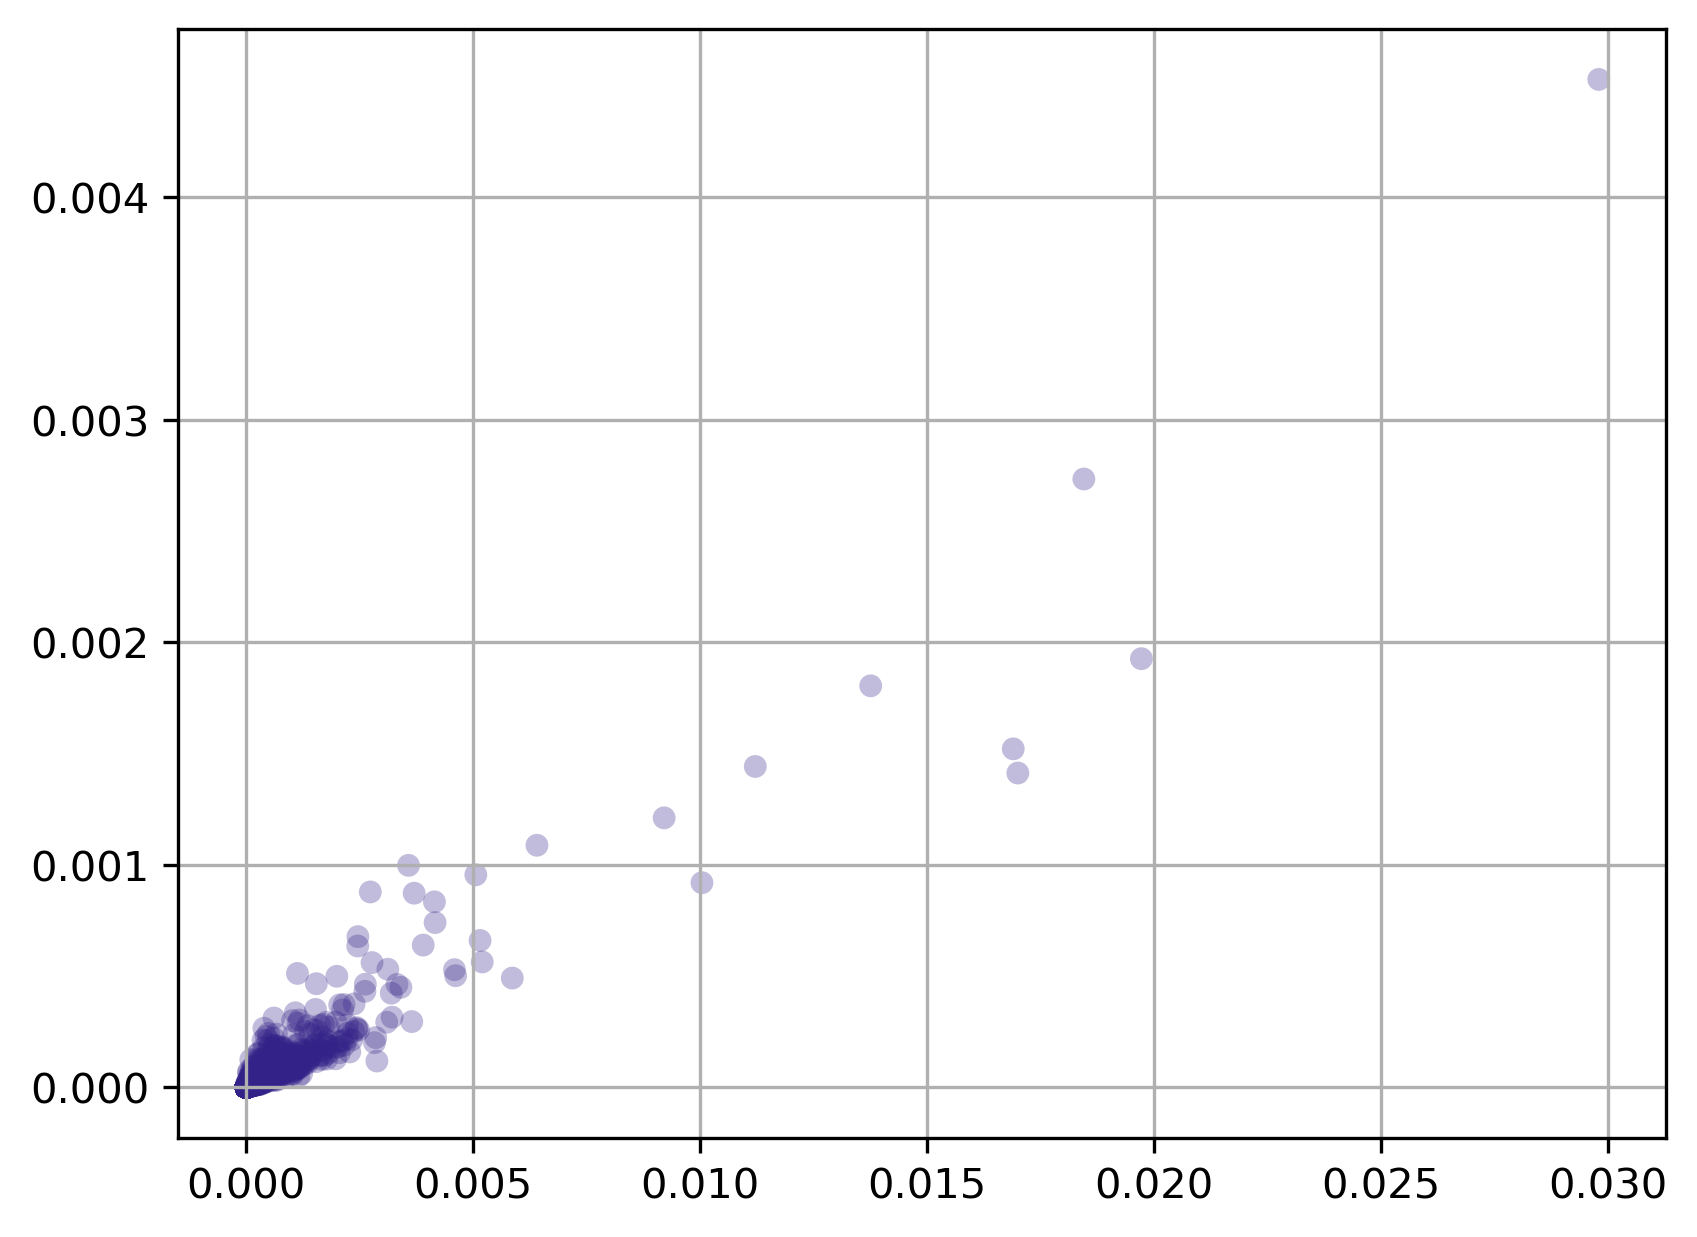

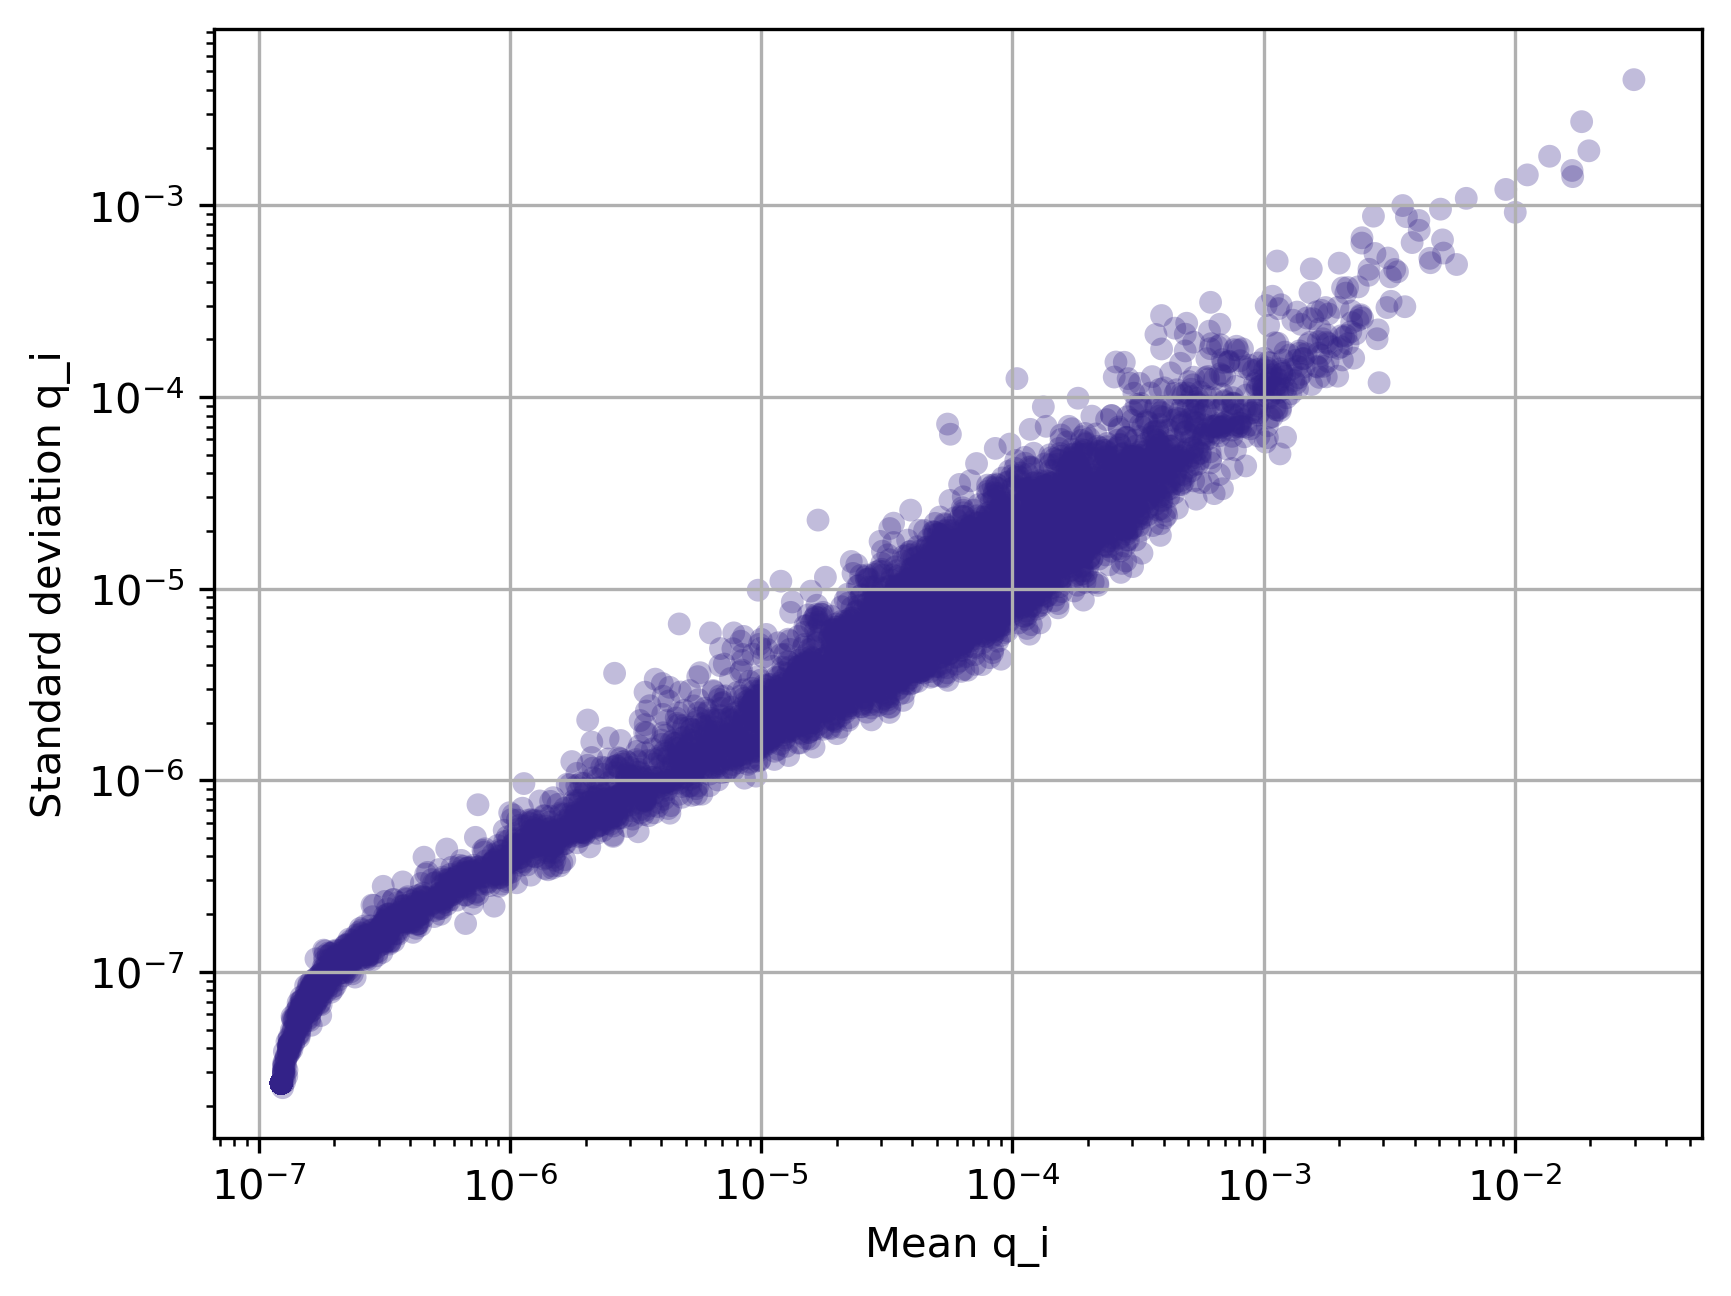

In [10]:
WT_yeast_q_stats = WT_yeast_q.transpose().describe()

display(WT_yeast_q_stats)


# ------------

fig, ax = plt.subplots(dpi=300)

ax.grid()
ax.scatter(WT_yeast_q_stats.loc['mean'], WT_yeast_q_stats.loc['std'],
            
c='#332288', s=30, 
alpha=0.3, edgecolors='none')


plt.show()

# ------------

fig, ax = plt.subplots(dpi=300)

ax.grid()

ax.set_xscale("log", base=10)
ax.set_yscale("log", base=10)

ax.set_xlabel('Mean q_i')
ax.set_ylabel('Standard deviation q_i')

ax.scatter(WT_yeast_q_stats.loc['mean'], WT_yeast_q_stats.loc['std'],
            
c='#332288', s=30,
alpha=0.3, edgecolors='none')


plt.show()

# middle one exported as variability_WT.png for manuscript

,0,1,2,3,4,5,6,7,8,9,...,7116,7117,7118,7119,7120,7121,7122,7123,7124,7125
count,4.200000e+01,42.000000,4.200000e+01,42.000000,42.000000,42.000000,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,...,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01,4.200000e+01
mean,2.269129e-06,0.000013,3.543801e-07,0.000020,0.000024,0.000004,1.147410e-07,1.147410e-07,1.147410e-07,1.147410e-07,...,1.282242e-07,1.486830e-07,1.523623e-07,1.491148e-07,1.372880e-07,1.329131e-07,1.620484e-07,1.253213e-07,1.311415e-07,1.147410e-07
std,3.823325e-06,0.000017,1.749221e-07,0.000003,0.000017,0.000002,1.980564e-08,1.980564e-08,1.980564e-08,1.980564e-08,...,4.445618e-08,6.926194e-08,5.920451e-08,8.483875e-08,5.497411e-08,5.197522e-08,8.512592e-08,3.823009e-08,5.143730e-08,1.980564e-08
min,2.900728e-07,0.000001,1.004077e-07,0.000013,0.000007,0.000001,6.586331e-08,6.586331e-08,6.586331e-08,6.586331e-08,...,6.586331e-08,6.586331e-08,6.586331e-08,6.586331e-08,6.586331e-08,7.176581e-08,8.013002e-08,6.586331e-08,6.586331e-08,6.586331e-08
25%,5.754724e-07,0.000003,2.265357e-07,0.000019,0.000015,0.000002,1.025569e-07,1.025569e-07,1.025569e-07,1.025569e-07,...,1.049756e-07,1.098980e-07,1.128948e-07,1.049253e-07,1.070801e-07,1.049756e-07,1.102414e-07,1.046734e-07,1.025569e-07,1.025569e-07
50%,8.988796e-07,0.000006,3.352574e-07,0.000020,0.000020,0.000003,1.137564e-07,1.137564e-07,1.137564e-07,1.137564e-07,...,1.188233e-07,1.220604e-07,1.308374e-07,1.211430e-07,1.220604e-07,1.188233e-07,1.280490e-07,1.188233e-07,1.188233e-07,1.137564e-07
75%,1.906459e-06,0.000010,4.509035e-07,0.000022,0.000026,0.000004,1.284793e-07,1.284793e-07,1.284793e-07,1.284793e-07,...,1.341553e-07,1.783405e-07,1.997042e-07,1.476619e-07,1.440086e-07,1.375894e-07,1.997042e-07,1.341553e-07,1.375894e-07,1.284793e-07
max,2.240068e-05,0.000080,7.254089e-07,0.000028,0.000094,0.000012,1.506258e-07,1.506258e-07,1.506258e-07,1.506258e-07,...,2.900728e-07,4.053070e-07,3.419528e-07,5.401724e-07,3.380507e-07,3.405855e-07,4.358026e-07,2.702047e-07,3.293847e-07,1.506258e-07


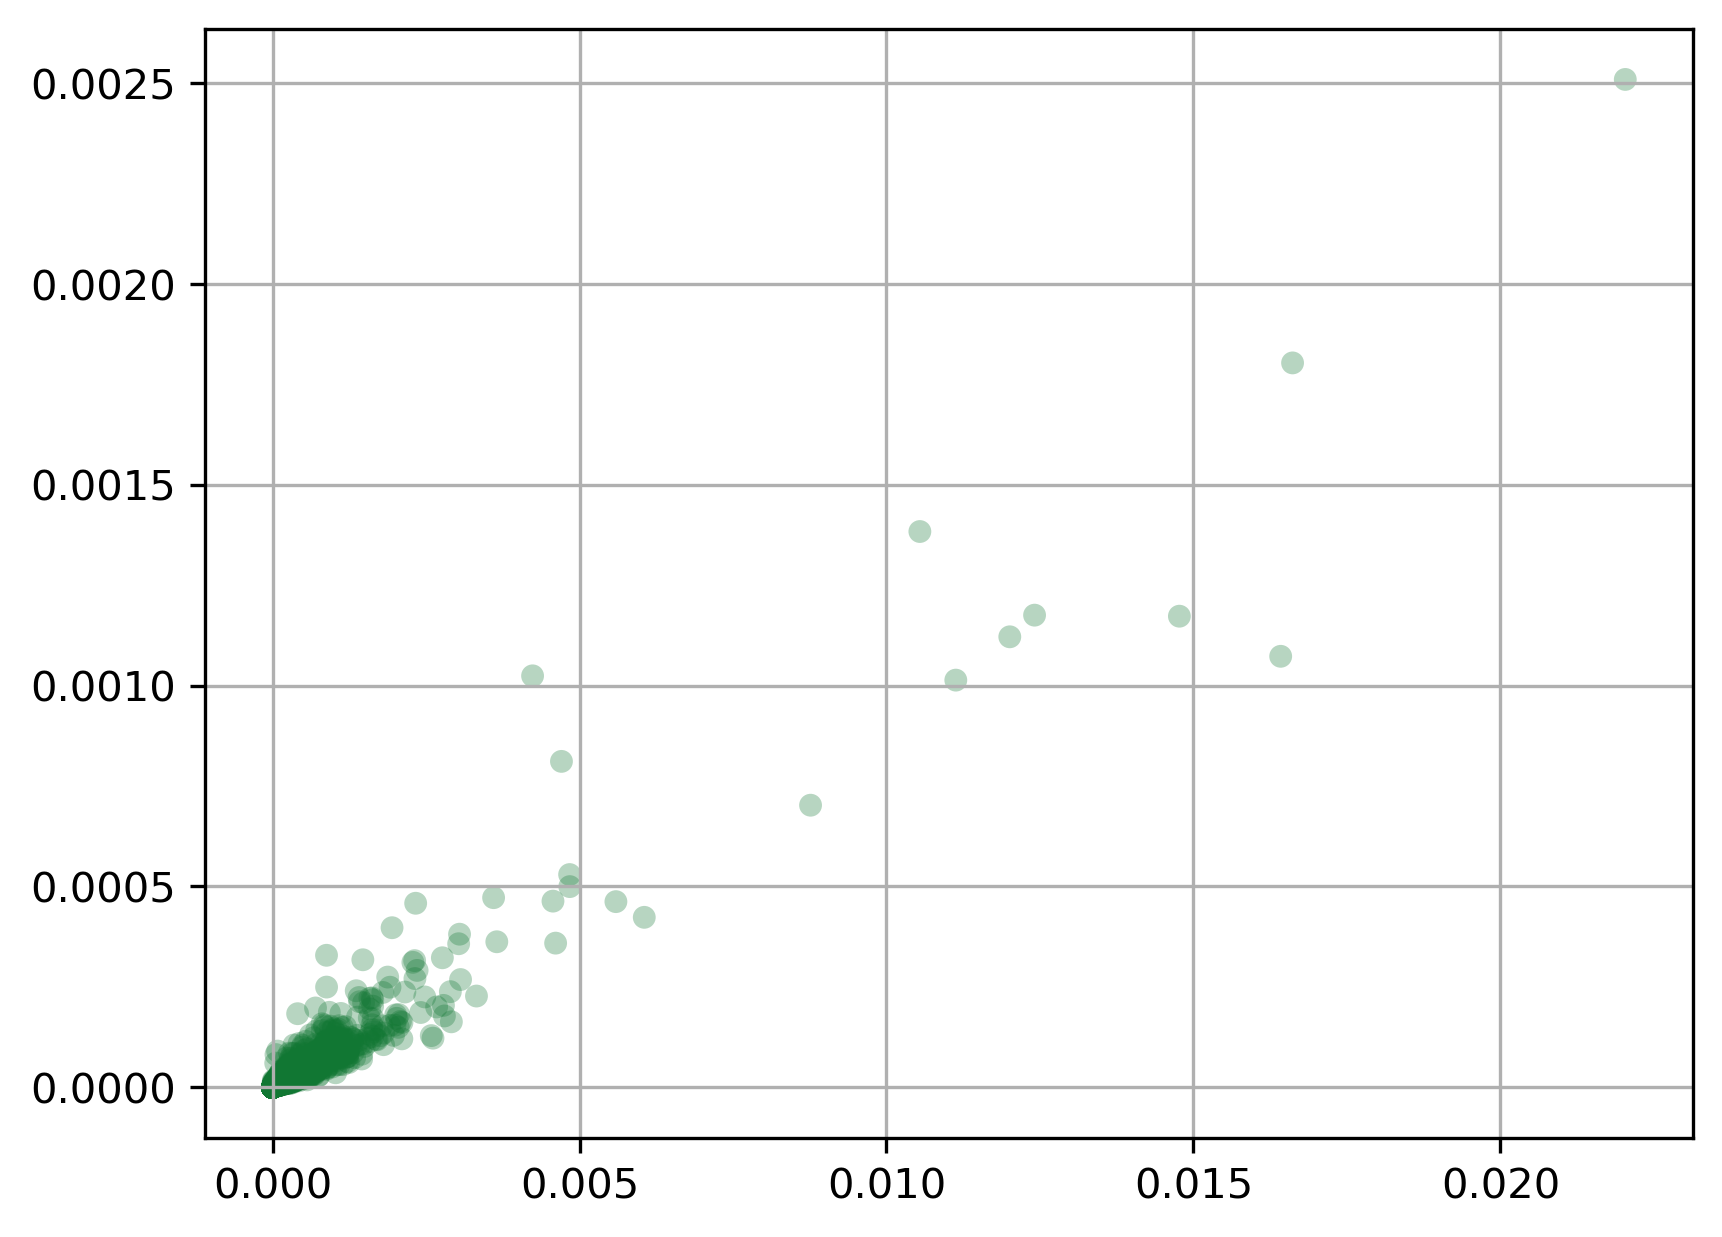

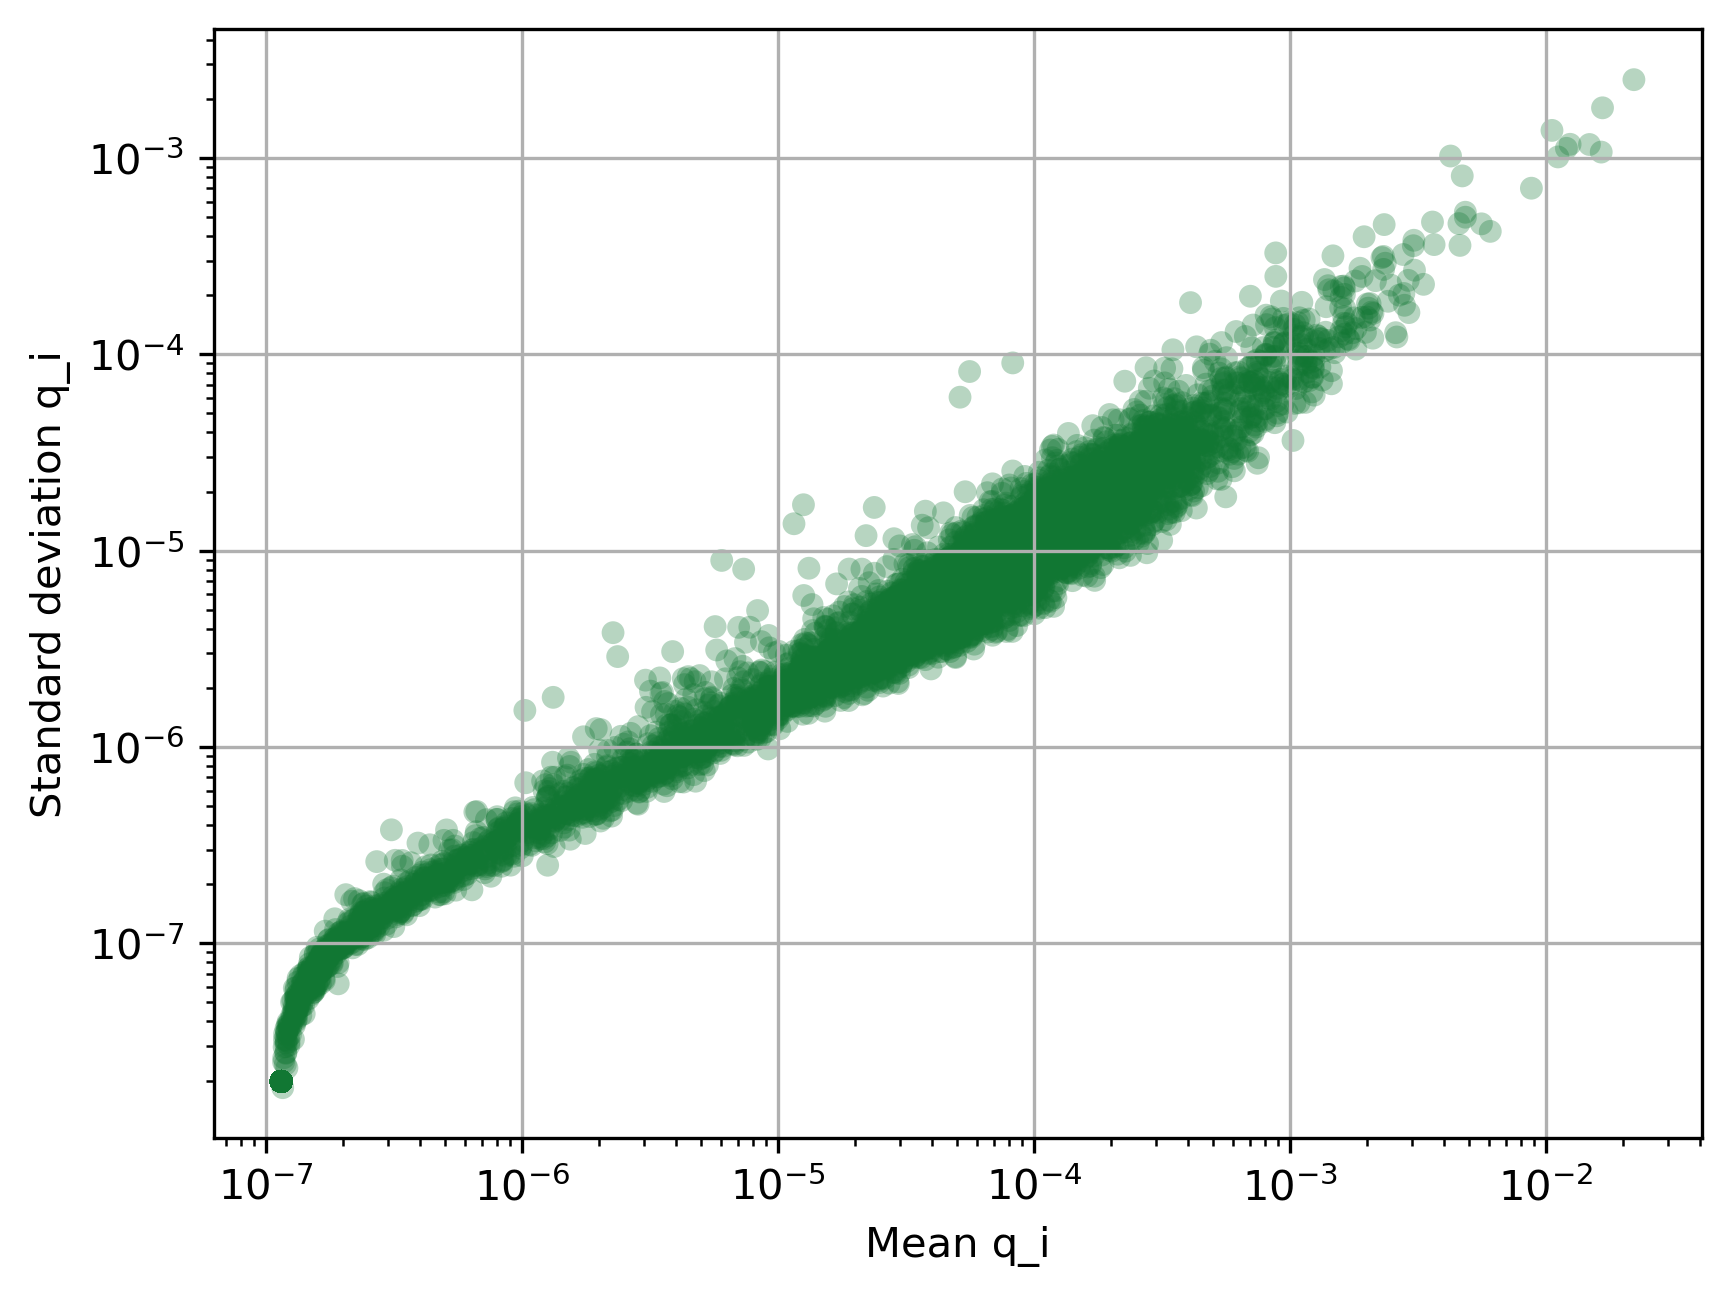

In [11]:
Snf2_yeast_q_stats = Snf2_yeast_q.transpose().describe()

display(Snf2_yeast_q_stats)


# ------------

fig, ax = plt.subplots(dpi=300)

ax.grid()
ax.scatter(Snf2_yeast_q_stats.loc['mean'], Snf2_yeast_q_stats.loc['std'],
            
c='#117733', s=30, 
alpha=0.3, edgecolors='none')


plt.show()

# ------------

fig, ax = plt.subplots(dpi=300)

ax.grid()

ax.set_xscale("log", base=10)
ax.set_yscale("log", base=10)

ax.set_xlabel('Mean q_i')
ax.set_ylabel('Standard deviation q_i')

ax.scatter(Snf2_yeast_q_stats.loc['mean'], Snf2_yeast_q_stats.loc['std'],
            
c='#117733', s=30,
alpha=0.3, edgecolors='none')



# middle one exported as variability_Snf2.png for manuscript

In [12]:
# importing results from differential gene expression anaylsis
RALL_bayexpress = pd.read_csv('RALL_bayexpress.csv', index_col=0)
# this file is originally created from do_DGE.ipynb (BF_21, FC)
# then it was updated in explore_clean_yeast_consistency.ipynb (adding BF_k1)

display(RALL_bayexpress)

,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
0,15S_rRNA,-3.710645,0.274047,-107.138056,False,53.627445,True
1,21S_rRNA,-1.302642,0.147177,362.115507,True,1052.203968,True
2,HRA1,-5.206545,-0.564787,-240.338654,False,-258.581365,False
3,ICR1,76.746125,0.504048,-194.077441,False,-196.467262,False
4,LSR1,0.451012,0.120243,251.787125,True,478.066414,True
...,...,...,...,...,...,...,...
7121,tY(GUA)J2,-7.312143,0.861839,-270.299503,False,-281.214963,False
7122,tY(GUA)M1,-7.406574,0.022303,-262.736078,False,-275.253246,False
7123,tY(GUA)M2,-7.727890,0.183767,-271.177492,False,-284.863866,False
7124,tY(GUA)O,-7.622253,0.347266,-270.291196,False,-282.682788,False


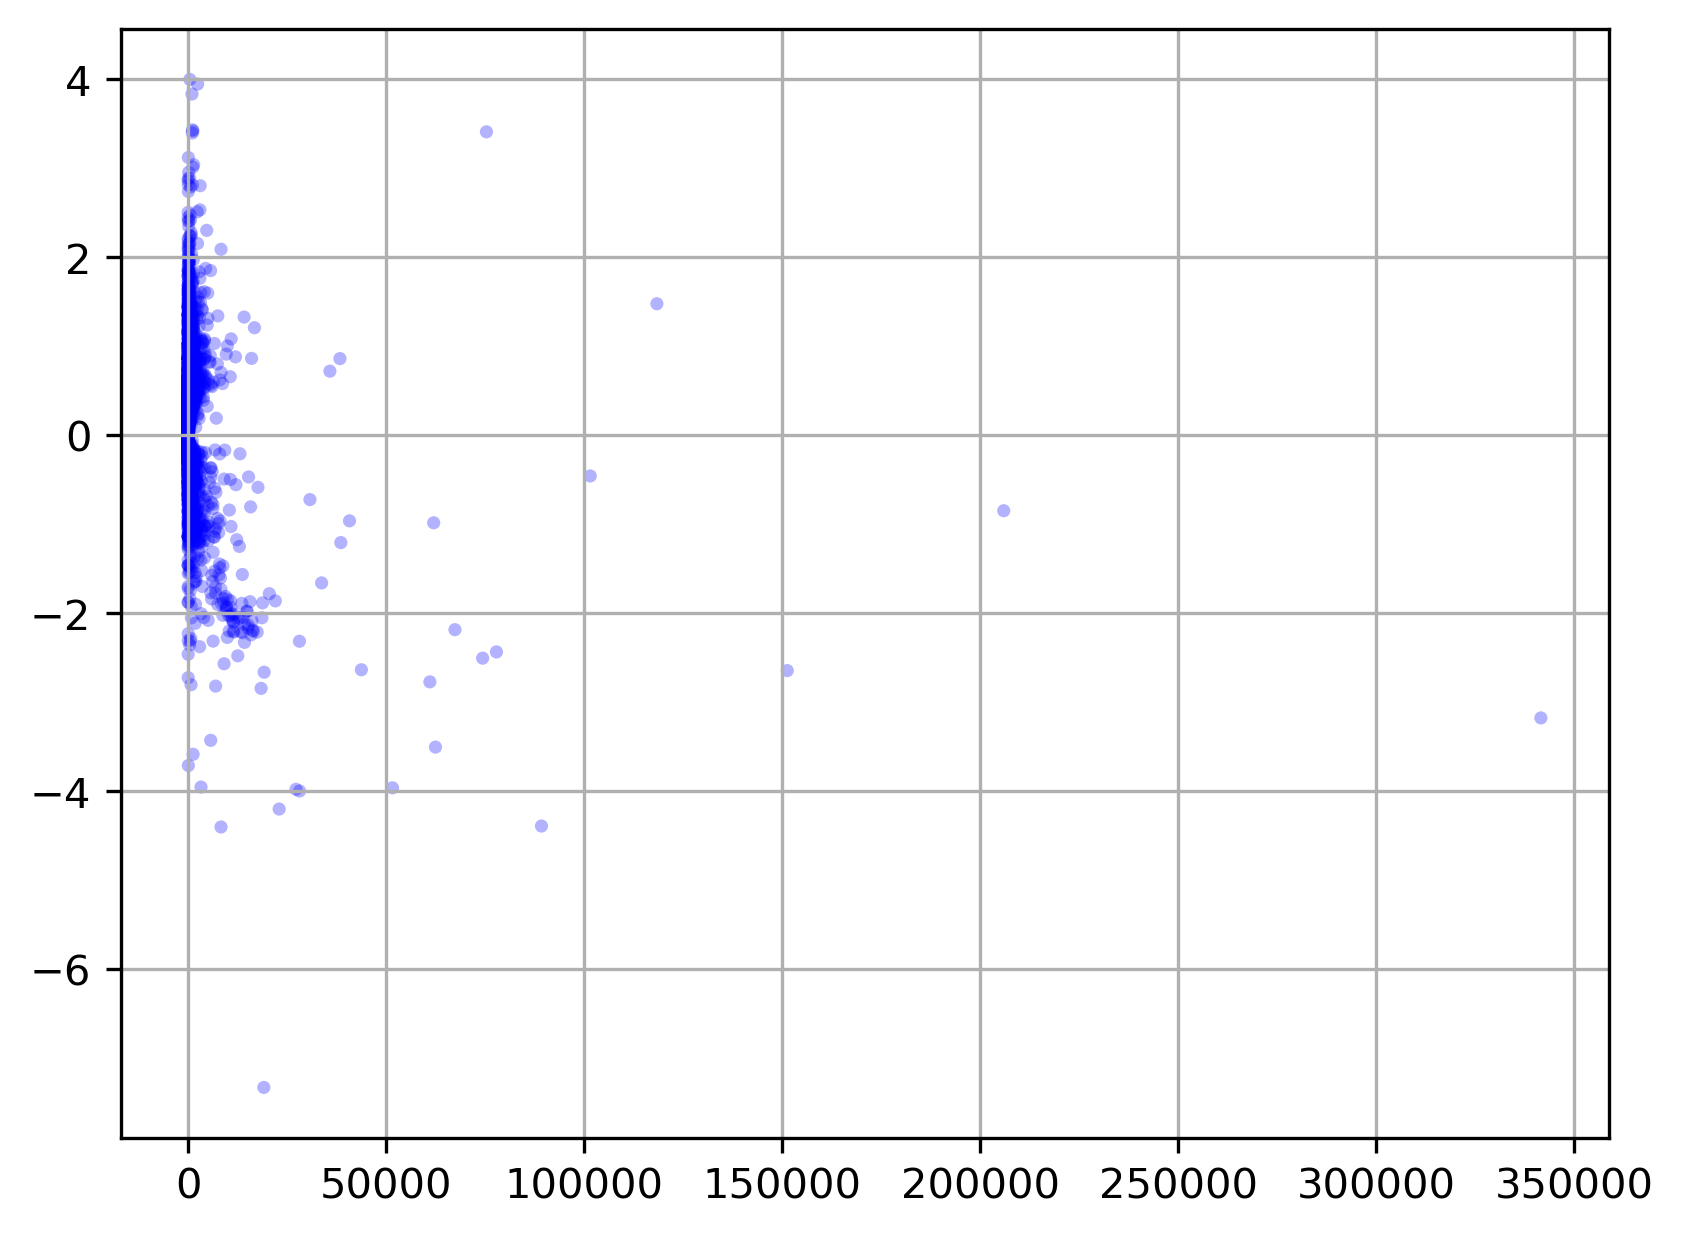

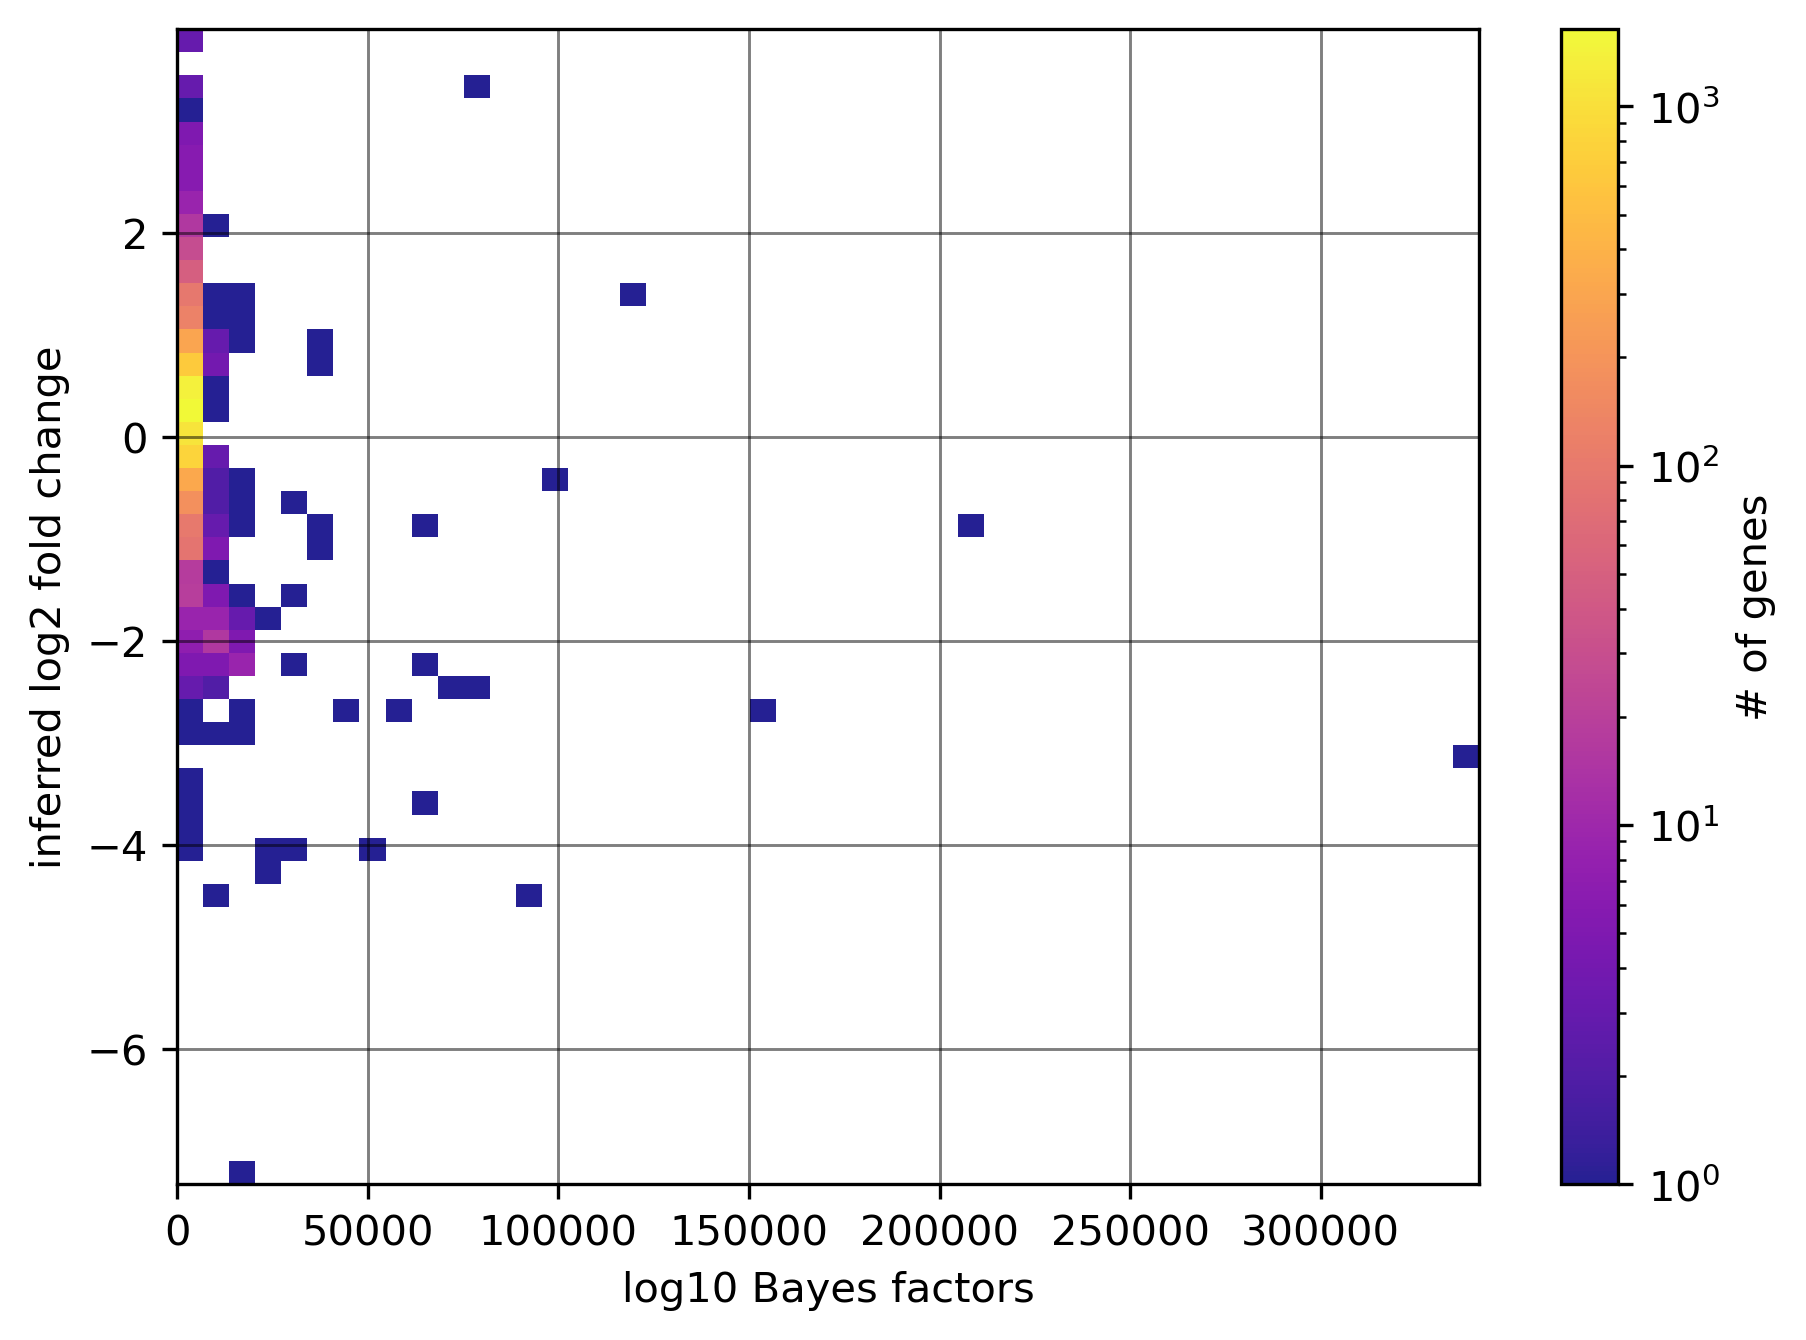

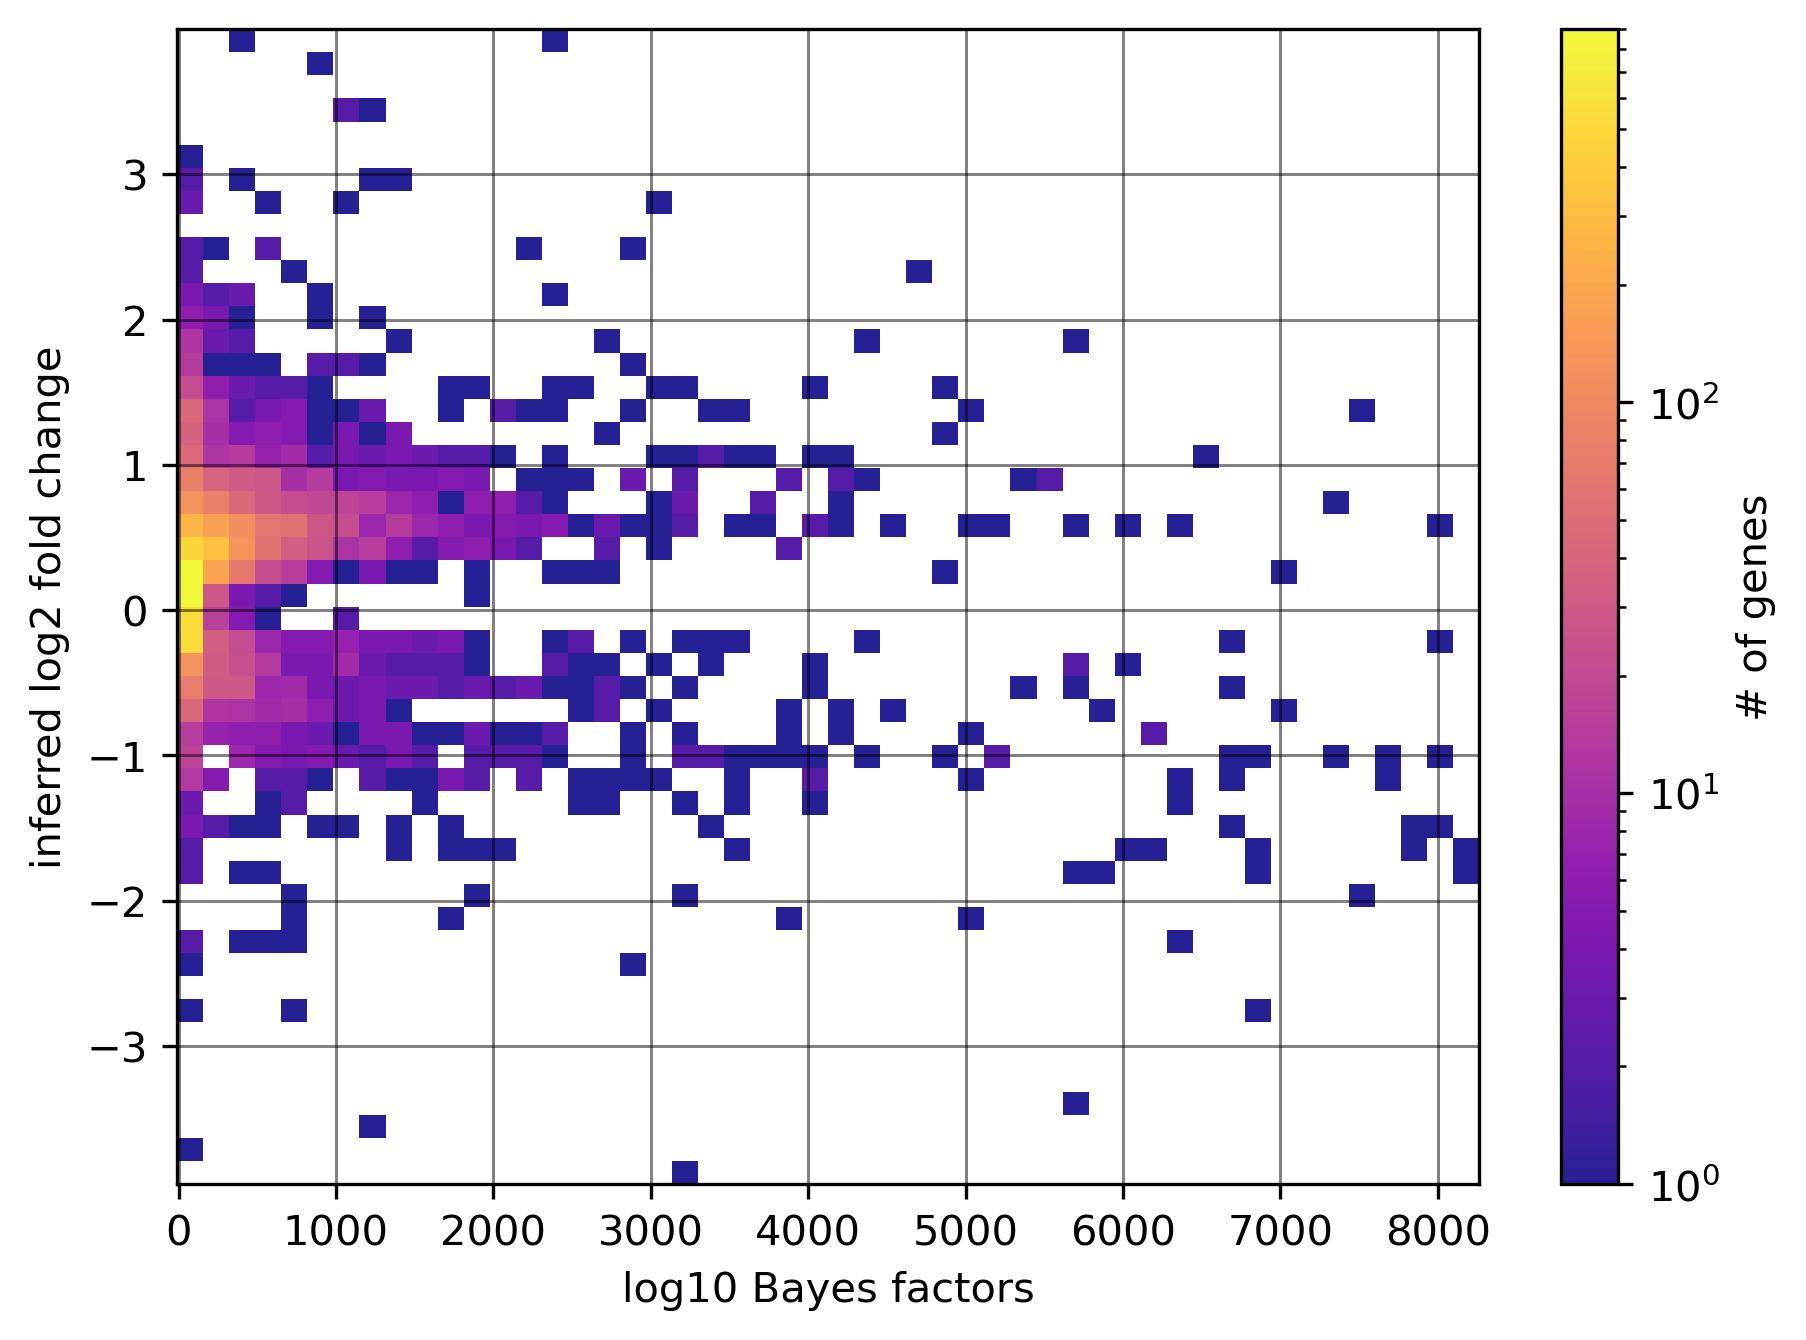

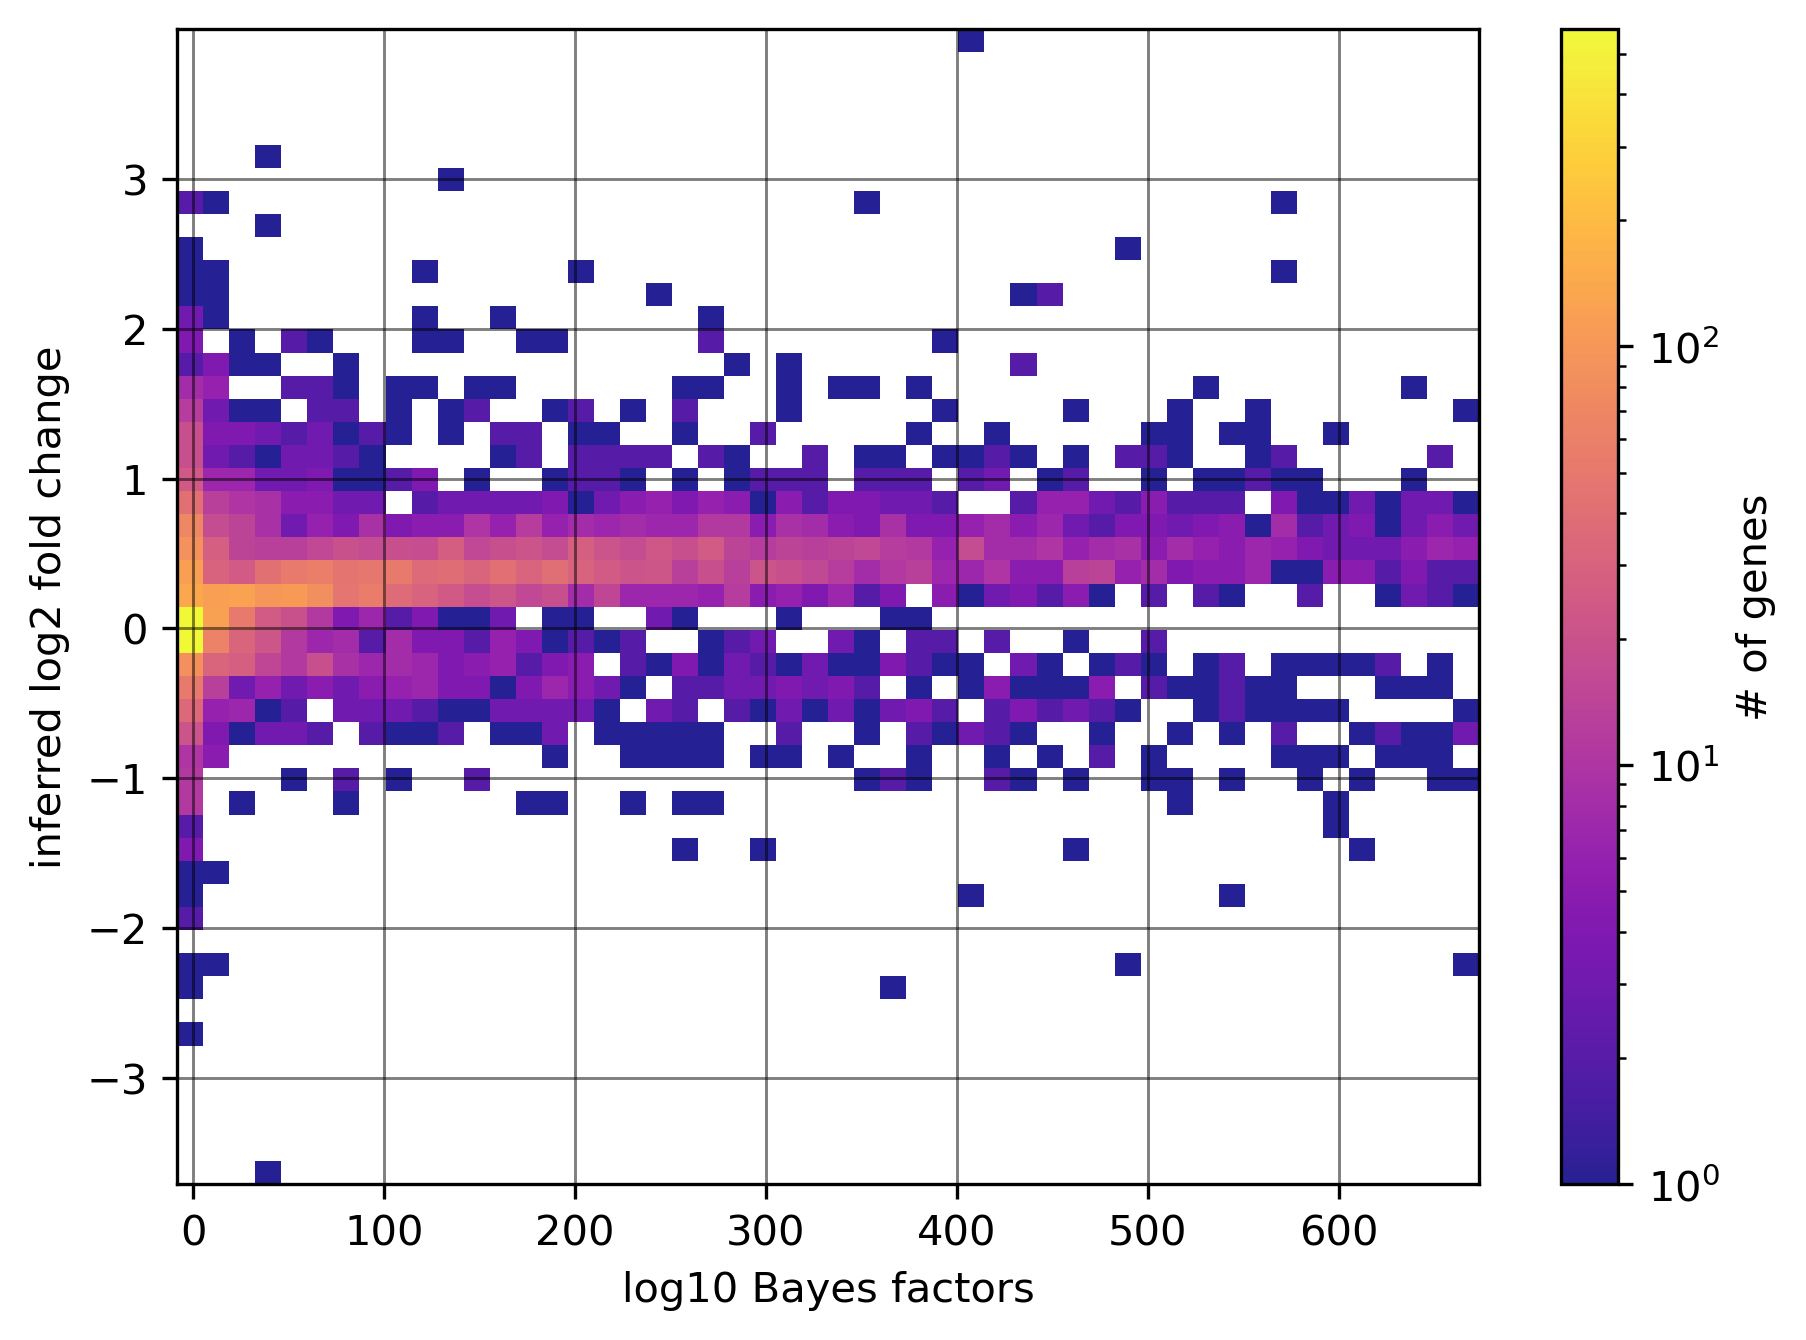

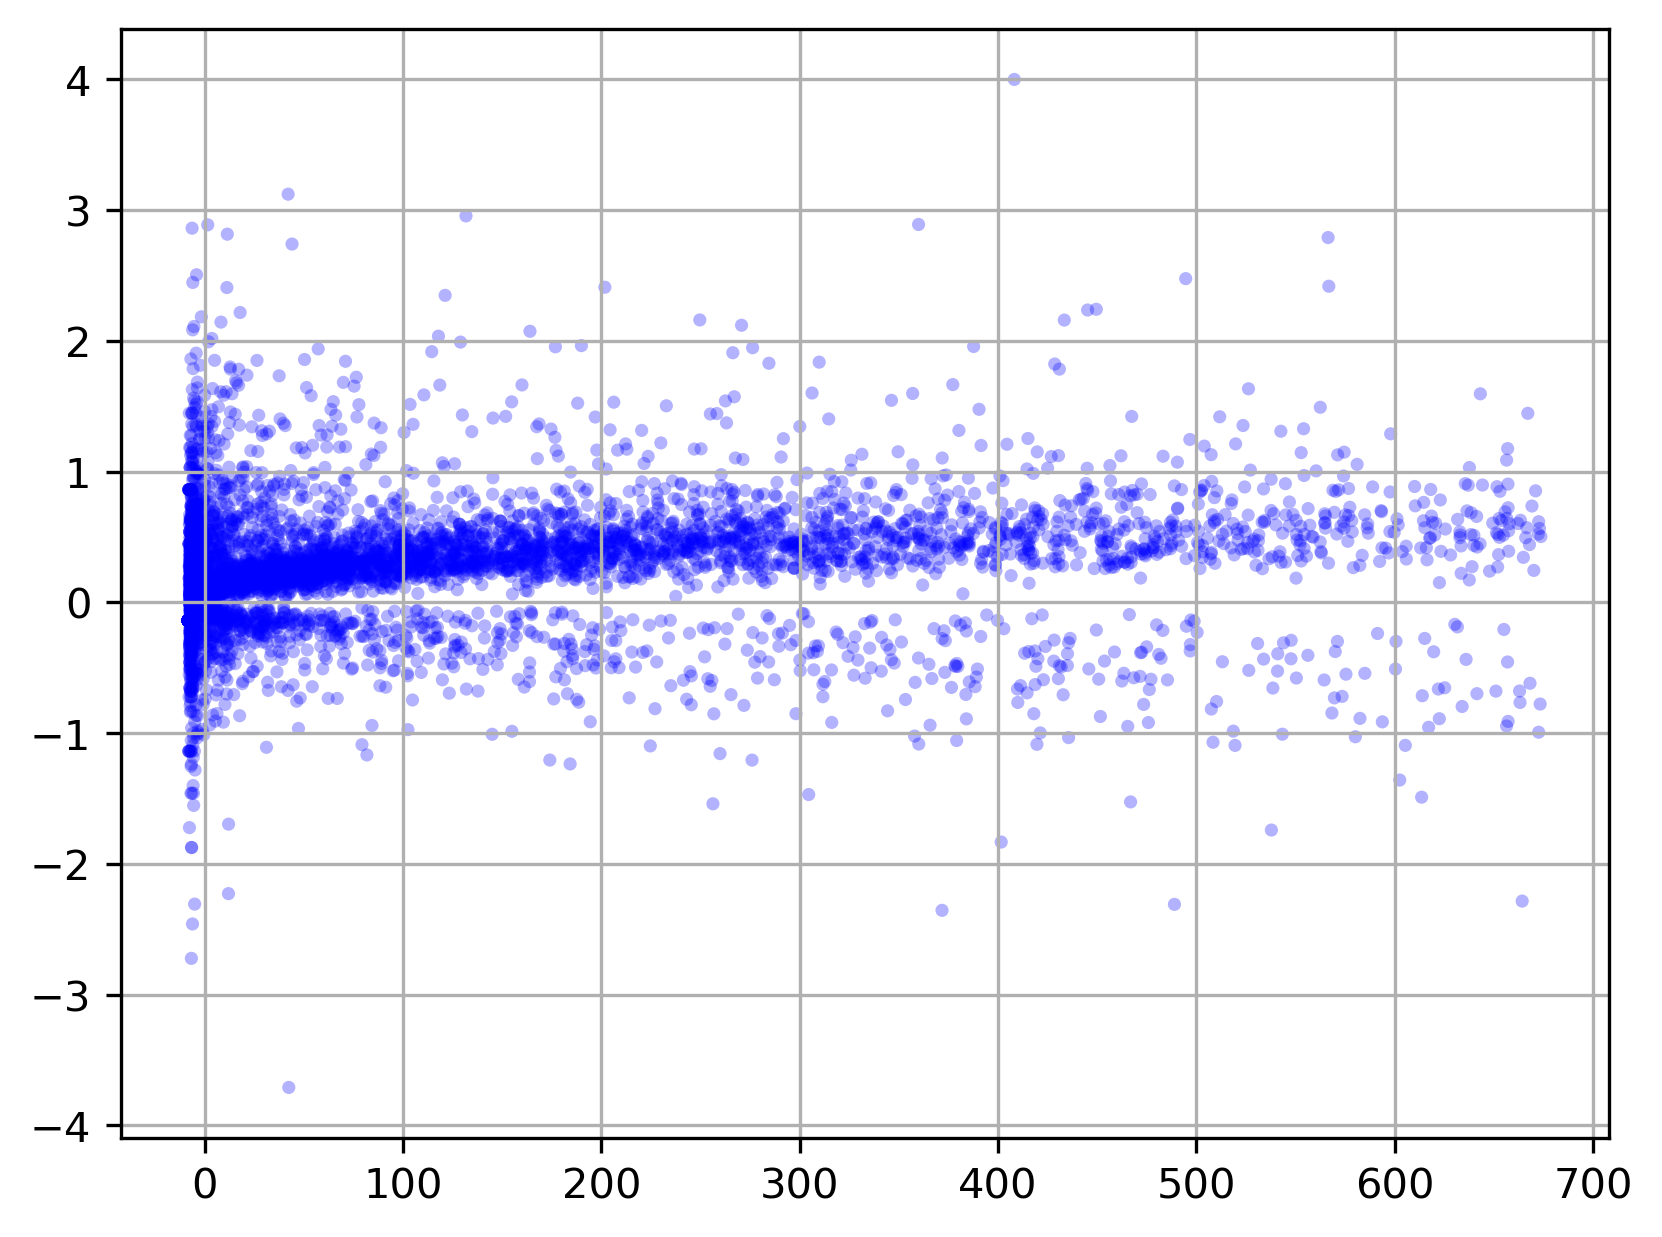

In [13]:
# 'volcano plots' =  BF_21 vs. iFC

def get_denstiy_volcano(x, y):
    
    fig, ax = plt.subplots(figsize=(7,5), dpi=300)

    plt.hist2d( x, y, bins=50, norm=m.colors.LogNorm(), cmap='plasma', 
                # range=[[1, 1100], [0.0, 0.0105]], 
                alpha=0.9)

    plt.grid(color='black', linestyle='-', linewidth=0.7, alpha=0.5)
    
    cbar = plt.colorbar()

    cbar.set_label('# of genes')

    plt.xlabel('log10 Bayes factors')
    plt.ylabel('inferred log2 fold change')

    plt.show()

# ------------

fig, ax = plt.subplots(dpi=300)

ax.grid()
ax.scatter(RALL_bayexpress['BF_21'], RALL_bayexpress['FC'],
            
c='blue', s=10, 
alpha=0.3, edgecolors='none')


plt.show()

# ------------


get_denstiy_volcano(RALL_bayexpress['BF_21'], RALL_bayexpress['FC'])
get_denstiy_volcano(RALL_bayexpress.sort_values(by='BF_21')[:-100]['BF_21'], RALL_bayexpress.sort_values(by='BF_21')[:-100]['FC'])
get_denstiy_volcano(RALL_bayexpress.sort_values(by='BF_21')[:-1000]['BF_21'], RALL_bayexpress.sort_values(by='BF_21')[:-1000]['FC'])

# ------------

fig, ax = plt.subplots(dpi=300)

ax.grid()
ax.scatter(RALL_bayexpress.sort_values(by='BF_21')[:-1000]['BF_21'], RALL_bayexpress.sort_values(by='BF_21')[:-1000]['FC'],
            
c='blue', s=10, 
alpha=0.3, edgecolors='none')


plt.show()

# ------------


In [14]:
results_RALL = pd.read_csv('results_RALL.csv', index_col=0)

results_RALL

,locus_name,FC0_bayexpress,FC1_bayexpress,FC2_bayexpress,FC0_edgeR,FC1_edgeR,FC2_edgeR,FC0_DESeq2,FC1_DESeq2,FC2_DESeq2
0,15S_rRNA,False,False,False,NaN,NaN,NaN,False,False,False
1,21S_rRNA,False,False,False,False,False,False,False,False,False
2,HRA1,False,False,False,NaN,NaN,NaN,True,False,False
3,ICR1,True,False,False,True,False,False,True,False,False
4,LSR1,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
7121,tY(GUA)J2,False,False,False,NaN,NaN,NaN,False,False,False
7122,tY(GUA)M1,False,False,False,NaN,NaN,NaN,False,False,False
7123,tY(GUA)M2,False,False,False,NaN,NaN,NaN,False,False,False
7124,tY(GUA)O,False,False,False,NaN,NaN,NaN,False,False,False


# Searching for examples for the paper

In [15]:
# lowest BF_21

display(RALL_bayexpress.sort_values(by='BF_21')[:5])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[:5].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[:5].index])

print(list(RALL_bayexpress.sort_values(by='BF_21')[:5].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
50,RPM1,-8.27372,-0.138161,-275.349735,False,-289.991744,False
4600,YLR410W-A,-8.27372,-0.138161,-275.349735,False,-289.991744,False
664,YCL022C,-8.27372,-0.138161,-275.349735,False,-289.991744,False
47,RDN58-1,-8.27372,-0.138161,-275.349735,False,-289.991744,False
2901,YHR073C-B,-8.27372,-0.138161,-275.349735,False,-289.991744,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
RPM1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YLR410W-A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YCL022C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RDN58-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YHR073C-B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
RPM1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YLR410W-A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YCL022C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RDN58-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
YHR073C-B,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


['RPM1', 'YLR410W-A', 'YCL022C', 'RDN58-1', 'YHR073C-B']


In [16]:
# low, but not lowest BF_21

display(RALL_bayexpress.sort_values(by='BF_21')[1000:1005])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[1000:1005].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[1000:1005].index])

print(list(RALL_bayexpress.sort_values(by='BF_21')[1000:1005].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
6763,snR32,-5.400319,-0.106770,-173.267945,False,-199.190675,False
6255,YPL032C,-5.393590,0.009353,15.238002,True,-61.994904,False
5212,YNL034W,-5.392332,-0.122325,-220.383309,False,-234.900049,False
5369,YNL179C,-5.390990,0.073591,-206.024965,False,-203.008330,False
6253,YPL030W,-5.389092,0.027465,46.700324,True,-174.514572,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
snR32,22,65,37,32,60,81,32,21,59,43,...,23,50,64,38,18,14,38,36,65,27
YPL032C,775,1330,978,1470,1316,2684,1284,1254,1236,1300,...,1030,1656,1729,1157,903,872,1773,747,1894,1122
YNL034W,14,42,33,30,31,78,39,37,35,31,...,18,51,35,25,29,29,43,22,43,34
YNL179C,40,72,66,82,69,121,49,67,73,70,...,57,99,98,62,51,43,87,57,92,50
YPL030W,184,384,235,283,457,801,364,255,270,381,...,281,297,466,244,200,184,570,174,515,212


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
snR32,37,35,29,60,49,35,24,39,42,43,...,70,33,35,21,63,50,32,38,43,40
YPL032C,1643,1301,1153,1612,987,2242,1161,1532,860,1388,...,2383,1350,1488,978,1419,1514,1069,1348,1511,1103
YNL034W,25,34,26,50,25,47,31,29,26,32,...,50,34,40,21,35,33,16,27,34,24
YNL179C,113,70,40,96,52,104,79,102,42,85,...,138,82,76,45,75,85,82,75,88,70
YPL030W,380,282,308,347,236,484,306,381,327,331,...,561,312,324,275,302,377,320,387,398,352


['snR32', 'YPL032C', 'YNL034W', 'YNL179C', 'YPL030W']


In [17]:
# highest BF_21

display(RALL_bayexpress.sort_values(by='BF_21')[-5:])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[-5:].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[-5:].index])

print(list(RALL_bayexpress.sort_values(by='BF_21')[-5:].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
2639,YGR192C,101517.928512,-0.456369,52530.251796,True,23438.201797,True
6209,YOR383C,118338.158193,1.478789,1920.042323,True,10685.558763,True
1465,YDR342C,151255.899622,-2.643644,21822.485016,True,2076.867472,True
3012,YHR174W,205922.035360,-0.847059,13841.417356,True,7918.998188,True
1175,YDR077W,341558.582413,-3.175344,13017.391966,True,1422.483953,True


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YGR192C,188825,196804,172119,328674,225435,357247,261535,343455,268394,188415,...,246621,358116,278531,209062,191739,318398,338511,169415,348635,244192
YOR383C,12713,11599,10437,18694,10940,21254,11928,20445,14405,11202,...,11286,21585,17444,12251,10503,16357,18733,8162,19044,14295
YDR342C,20257,15357,26120,29846,13135,29153,16334,36916,24772,17410,...,13346,47023,14585,25504,23590,25281,20870,22192,24641,22226
YHR174W,129581,133346,109168,207147,145674,268592,196925,211933,189789,144101,...,157763,235246,191877,136675,120124,195917,243868,107856,237778,158290
YDR077W,35563,31153,31852,54048,30594,65771,39147,58449,45629,34232,...,37196,63004,38304,36697,33838,54827,54371,26658,50782,45913


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YGR192C,205731,199983,210124,204494,158243,242692,209080,210681,178901,246736,...,323457,180745,239701,163673,219417,167478,177709,170179,160083,142435
YOR383C,36728,39745,40978,49945,33631,56767,31049,52374,33049,43991,...,60183,37108,50351,34465,46750,37686,43105,47984,34235,29763
YDR342C,6160,4351,3760,5849,2707,8347,4344,2973,2201,3117,...,7219,4147,5938,2552,3313,4676,2446,2606,4178,1935
YHR174W,107206,100381,112005,104187,76754,126571,101232,105342,114602,110818,...,165739,86105,112391,81618,106975,86521,85779,95411,83560,75125
YDR077W,5978,5813,4679,5852,4049,9193,4939,4684,2002,5751,...,9285,5125,7021,4165,5594,5013,4016,3755,4674,3275


['YGR192C', 'YOR383C', 'YDR342C', 'YHR174W', 'YDR077W']


In [18]:
# high, but not highest BF_21

display(RALL_bayexpress.sort_values(by='BF_21')[5300:5305])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[5300:5305].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[5300:5305].index])

print(list(RALL_bayexpress.sort_values(by='BF_21')[5300:5305].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
1238,YDR135C,328.053071,0.253216,-81.657533,False,-155.508067,False
2584,YGR145W,329.378106,-0.441581,645.200622,True,-0.779638,True
4868,YMR048W,329.411226,0.797614,-202.050367,False,-190.785337,False
284,YBL091C-A,329.590455,0.553309,-91.643702,False,-137.212254,False
1282,YDR177W,329.624333,0.344439,-171.481791,False,-148.374583,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YDR135C,1596,1800,1463,2320,1814,3673,2131,2628,2003,2096,...,1755,3092,2368,1915,1380,2163,3052,1399,2886,1802
YGR145W,438,891,476,698,1031,2215,1105,782,813,1100,...,844,957,1502,666,343,532,1553,353,1716,542
YMR048W,125,178,146,217,178,257,136,217,178,152,...,136,249,209,152,131,158,216,122,265,153
YBL091C-A,318,347,332,574,328,525,315,456,457,341,...,278,623,295,336,449,395,463,311,488,455
YDR177W,765,1057,857,1267,1099,1847,1173,1154,1142,1031,...,939,1551,1161,947,835,999,1441,726,1600,990


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YDR135C,2687,2637,2489,3144,1990,3583,2327,2948,2274,2988,...,4583,2441,2970,2313,2746,2359,2152,2775,2391,2020
YGR145W,630,612,629,849,360,928,481,886,827,752,...,1142,639,586,527,578,648,574,811,642,529
YMR048W,390,310,331,418,243,479,292,276,296,303,...,597,297,398,231,342,326,266,267,383,258
YBL091C-A,789,634,621,701,527,861,566,571,458,640,...,941,518,788,485,756,699,593,536,624,598
YDR177W,1701,1455,1319,1904,1164,2061,1369,1524,1131,1520,...,2610,1344,1703,1165,1475,1562,1331,1315,1609,1171


['YDR135C', 'YGR145W', 'YMR048W', 'YBL091C-A', 'YDR177W']


In [19]:
# high, but not highest BF_21 2

display(RALL_bayexpress.sort_values(by='BF_21')[4000:4005])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[4000:4005].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[4000:4005].index])

print(list(RALL_bayexpress.sort_values(by='BF_21')[4000:4005].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
5214,YNL036W,124.393784,0.242757,404.142375,True,126.675977,True
5482,YNL289W,124.447481,0.358329,16.278480,True,7.075074,True
1272,YDR169C,124.531457,0.255612,-131.702098,False,-69.027815,False
5158,YMR310C,124.667567,-0.465041,7.676037,True,-145.101579,False
1305,YDR196C,124.724642,0.284932,-121.255379,False,-156.327056,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YNL036W,823,691,867,1408,693,1057,713,1099,657,541,...,671,1645,677,728,954,933,925,693,889,1049
YNL289W,344,335,373,504,418,538,348,394,303,228,...,312,396,412,319,366,409,488,261,411,335
YDR169C,516,759,702,983,743,1551,724,820,801,779,...,616,1154,904,728,619,617,1014,546,1089,796
YMR310C,133,404,217,327,486,612,284,273,326,320,...,275,259,415,226,166,186,498,164,426,281
YDR196C,479,626,559,893,602,1019,587,680,744,641,...,496,894,625,547,592,516,643,460,828,596


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YNL036W,1603,972,894,1525,889,1432,1198,1077,664,1095,...,1626,1067,1530,647,1131,1381,880,824,1381,843
YNL289W,534,390,477,610,583,691,437,558,421,544,...,976,456,476,451,675,388,610,476,512,523
YDR169C,1251,1027,883,1283,813,1612,881,1017,601,1034,...,1812,1063,1147,836,1122,1160,725,955,984,742
YMR310C,285,190,155,218,183,262,242,256,141,242,...,338,207,312,175,282,294,254,211,331,249
YDR196C,963,769,744,1071,652,1195,850,831,596,881,...,1333,722,942,570,895,909,710,760,836,703


['YNL036W', 'YNL289W', 'YDR169C', 'YMR310C', 'YDR196C']


In [20]:
# examples to discuss ...

display(RALL_bayexpress.sort_values(by='BF_21')[2000:2005])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[2000:2005].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[2000:2005].index])

print(list(RALL_bayexpress.sort_values(by='BF_21')[2000:2005].locus_name))

,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
5422,YNL232W,7.174900,0.090803,-48.996454,False,-181.486812,False
4511,YLR329W,7.203850,0.306775,-196.805858,False,-205.931345,False
1409,YDR291W,7.219764,0.111894,-95.144699,False,-163.157529,False
6701,YPR164W,7.242236,0.115596,-129.747251,False,-198.587507,False
6459,YPL227C,7.247946,0.104776,-124.629656,False,-150.409227,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YNL232W,388,697,459,658,779,1276,674,718,769,751,...,528,775,833,529,395,536,1068,385,1080,515
YLR329W,30,49,62,88,64,104,48,34,53,54,...,29,85,56,43,52,27,71,44,86,51
YDR291W,268,443,315,477,451,956,473,409,458,511,...,337,586,516,380,261,323,603,288,659,359
YPR164W,247,418,292,425,408,879,456,432,388,459,...,340,552,482,383,270,328,621,267,613,363
YPL227C,278,544,401,549,554,1031,508,498,485,531,...,424,669,676,431,405,329,666,343,736,438


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YNL232W,841,622,644,855,573,983,688,772,635,764,...,1335,666,913,595,804,679,714,710,768,646
YLR329W,112,65,71,104,52,114,62,73,50,68,...,111,65,73,47,70,120,59,56,105,57
YDR291W,630,488,538,663,399,753,410,564,461,507,...,816,434,496,391,453,477,425,570,524,405
YPR164W,512,478,462,545,356,682,411,539,417,510,...,805,403,470,379,478,459,388,485,420,389
YPL227C,679,479,489,768,412,836,457,631,563,615,...,996,543,520,391,586,559,507,587,629,538


['YNL232W', 'YLR329W', 'YDR291W', 'YPR164W', 'YPL227C']


In [21]:
# around 0

display(RALL_bayexpress.sort_values(by='BF_21')[1600:1605])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[1600:1605].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[1600:1605].index])

print(list(RALL_bayexpress.sort_values(by='BF_21')[1600:1605].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
1963,YER151C,-0.373514,0.049792,63.640753,True,-72.322302,False
2237,YGL077C,-0.373193,-0.037271,101.080186,True,143.447054,True
2827,YHR015W,-0.370850,0.419157,-226.669164,False,-232.161148,False
4164,YLR015W,-0.369906,0.090653,-118.413245,False,-182.862608,False
2044,YFL025C,-0.361935,0.082463,-96.020832,False,-170.631536,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YER151C,520,986,668,970,1040,2049,967,875,942,1000,...,756,1128,1301,804,652,609,1267,529,1446,775
YGL077C,1194,1616,1150,1768,1902,3462,1815,1548,1736,1634,...,1309,1946,1950,1300,1008,1380,2694,940,2413,1294
YHR015W,5,17,15,20,11,28,7,11,9,21,...,10,22,19,7,13,7,15,10,23,15
YLR015W,148,276,193,298,262,655,356,289,230,361,...,240,364,397,254,211,205,445,144,476,212
YFL025C,204,387,304,402,358,729,354,301,314,398,...,275,430,432,326,230,213,509,210,502,323


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YER151C,1095,837,1010,1223,728,1570,742,1205,924,972,...,1811,949,937,728,1004,1032,934,1171,1091,873
YGL077C,2260,1410,1399,2245,1217,2698,1713,1590,1319,1452,...,3240,1593,1974,1145,1616,1855,1266,1465,2034,1255
YHR015W,31,9,10,24,12,33,14,17,20,19,...,28,11,19,15,21,31,11,13,24,11
YLR015W,305,347,292,400,218,502,251,356,302,311,...,609,294,345,219,336,342,265,365,300,287
YFL025C,485,341,357,502,282,551,329,464,292,409,...,717,368,356,315,377,446,352,412,398,349


['YER151C', 'YGL077C', 'YHR015W', 'YLR015W', 'YFL025C']


In [22]:
# where do the divisions get nice?

display(RALL_bayexpress.sort_values(by='BF_21')[1900:1905])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[1900:1905].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[1900:1905].index])

print(list(RALL_bayexpress.sort_values(by='BF_21')[1900:1905].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
6083,YOR268C,4.945761,0.606185,-227.400005,False,-234.373253,False
1939,YER133W-A,4.992124,0.329451,-202.119827,False,-209.011154,False
5130,YMR287C,4.998656,0.130939,-168.589524,False,-193.811308,False
3643,YJR082C,5.036586,0.129900,-191.637045,False,-174.338977,False
4763,YML089C,5.041583,1.384517,-245.989008,False,-251.595783,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YOR268C,3,10,7,6,17,27,7,15,15,13,...,3,14,16,5,2,8,19,9,20,7
YER133W-A,31,35,43,72,32,72,28,32,35,33,...,25,62,35,32,48,26,47,19,48,44
YMR287C,186,269,232,338,260,495,280,289,231,272,...,219,392,316,253,241,195,343,142,374,222
YJR082C,185,230,231,356,254,450,261,290,249,254,...,234,384,339,216,231,227,361,155,390,280
YML089C,2,0,3,1,1,1,1,1,2,0,...,1,2,3,2,3,2,1,1,0,0


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YOR268C,23,17,18,11,5,26,26,14,16,17,...,22,14,27,12,19,19,12,18,27,17
YER133W-A,62,50,38,61,41,102,39,64,66,42,...,78,39,50,40,48,57,47,47,55,82
YMR287C,374,281,282,380,236,472,251,355,251,322,...,539,265,314,225,332,341,280,312,353,268
YJR082C,374,292,236,399,262,455,272,368,186,363,...,487,301,344,230,355,319,283,306,315,249
YML089C,11,2,4,8,5,5,4,5,1,5,...,5,2,7,4,5,9,5,2,4,2


['YOR268C', 'YER133W-A', 'YMR287C', 'YJR082C', 'YML089C']


In [23]:
# low, but not lowest BF_21

display(RALL_bayexpress.sort_values(by='BF_21')[1000:1005])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[1000:1005].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='BF_21')[1000:1005].index])

print(list(RALL_bayexpress.sort_values(by='BF_21')[1000:1005].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
6763,snR32,-5.400319,-0.106770,-173.267945,False,-199.190675,False
6255,YPL032C,-5.393590,0.009353,15.238002,True,-61.994904,False
5212,YNL034W,-5.392332,-0.122325,-220.383309,False,-234.900049,False
5369,YNL179C,-5.390990,0.073591,-206.024965,False,-203.008330,False
6253,YPL030W,-5.389092,0.027465,46.700324,True,-174.514572,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
snR32,22,65,37,32,60,81,32,21,59,43,...,23,50,64,38,18,14,38,36,65,27
YPL032C,775,1330,978,1470,1316,2684,1284,1254,1236,1300,...,1030,1656,1729,1157,903,872,1773,747,1894,1122
YNL034W,14,42,33,30,31,78,39,37,35,31,...,18,51,35,25,29,29,43,22,43,34
YNL179C,40,72,66,82,69,121,49,67,73,70,...,57,99,98,62,51,43,87,57,92,50
YPL030W,184,384,235,283,457,801,364,255,270,381,...,281,297,466,244,200,184,570,174,515,212


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
snR32,37,35,29,60,49,35,24,39,42,43,...,70,33,35,21,63,50,32,38,43,40
YPL032C,1643,1301,1153,1612,987,2242,1161,1532,860,1388,...,2383,1350,1488,978,1419,1514,1069,1348,1511,1103
YNL034W,25,34,26,50,25,47,31,29,26,32,...,50,34,40,21,35,33,16,27,34,24
YNL179C,113,70,40,96,52,104,79,102,42,85,...,138,82,76,45,75,85,82,75,88,70
YPL030W,380,282,308,347,236,484,306,381,327,331,...,561,312,324,275,302,377,320,387,398,352


['snR32', 'YPL032C', 'YNL034W', 'YNL179C', 'YPL030W']


In [24]:
# highest FC

display(RALL_bayexpress.sort_values(by='FC')[-5:])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='FC')[-5:].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='FC')[-5:].index])

print(list(RALL_bayexpress.sort_values(by='FC')[-5:].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
232,YBL044W,1190.218507,3.420120,-224.950569,False,-191.272764,False
4262,YLR111W,1085.686987,3.433137,-226.056326,False,-184.539583,False
6200,YOR376W,945.384327,3.835562,-233.008444,False,-200.210258,False
6248,YPL025C,2386.585184,3.947768,-221.267660,False,-206.159190,False
2927,YHR095W,408.210025,3.999632,-244.792574,False,-220.261435,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YBL044W,10,20,11,17,8,13,8,10,18,13,...,11,10,19,9,8,14,20,14,26,12
YLR111W,8,15,13,17,10,21,12,12,12,6,...,4,19,17,16,16,8,14,10,14,17
YOR376W,5,6,4,10,7,18,5,9,9,9,...,6,5,6,2,7,6,4,5,13,4
YPL025C,14,15,12,21,16,30,10,24,16,19,...,10,23,13,10,10,13,27,10,24,20
YHR095W,0,3,1,2,3,2,3,4,4,3,...,0,3,4,3,2,1,5,1,5,3


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YBL044W,189,153,148,171,135,215,165,130,113,170,...,252,156,232,103,194,157,126,136,139,123
YLR111W,189,128,141,187,98,226,128,146,110,112,...,221,106,152,79,158,230,89,133,184,107
YOR376W,175,112,96,157,65,184,104,116,67,115,...,172,95,156,56,103,160,107,105,120,119
YPL025C,283,227,251,331,210,385,221,301,208,316,...,489,283,321,202,268,261,242,254,250,232
YHR095W,63,53,40,67,33,74,37,51,38,51,...,62,48,43,26,49,68,41,45,57,41


['YBL044W', 'YLR111W', 'YOR376W', 'YPL025C', 'YHR095W']


In [25]:
# fold change around 0

display(RALL_bayexpress.sort_values(by='FC')[2000:2005])

display(WT_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='FC')[2000:2005].index])
display(Snf2_yeast.set_index('genes').iloc[RALL_bayexpress.sort_values(by='FC')[2000:2005].index])

print(list(RALL_bayexpress.sort_values(by='FC')[2000:2005].locus_name))


,locus_name,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
5054,YMR216C,-5.730113,0.003245,-48.859730,False,-79.116589,False
1707,YEL019C,-6.396262,0.003307,-211.885879,False,-222.872968,False
6573,YPR048W,-6.070161,0.003459,-69.911613,False,-172.309287,False
1285,YDR179W-A,-6.215162,0.003479,-175.119826,False,-205.055615,False
6098,YOR283W,-5.802964,0.003752,-49.914425,False,-165.446596,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YMR216C,561,874,657,1001,787,1591,779,845,700,820,...,605,1213,924,793,740,541,973,480,1092,810
YEL019C,18,36,23,43,52,97,43,47,45,30,...,38,55,44,25,29,31,55,24,67,36
YPR048W,94,219,116,151,233,400,217,140,163,205,...,163,177,254,157,118,86,283,99,294,126
YDR179W-A,45,120,77,120,97,183,97,70,80,108,...,57,110,120,80,68,50,141,71,162,91
YOR283W,286,668,458,692,660,1209,621,489,597,662,...,469,649,763,466,420,395,793,316,875,469


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YMR216C,1057,818,852,1113,585,1488,676,902,710,839,...,1485,859,887,623,892,1058,633,875,917,704
YEL019C,61,49,40,56,27,64,37,46,25,51,...,78,35,52,39,41,56,28,41,50,33
YPR048W,203,135,177,222,131,291,134,225,212,202,...,296,167,141,113,184,184,163,225,255,172
YDR179W-A,130,102,85,124,73,127,65,112,70,87,...,174,91,90,50,108,109,85,105,125,97
YOR283W,679,531,554,728,423,860,537,697,620,621,...,964,552,664,424,683,649,639,607,685,560


['YMR216C', 'YEL019C', 'YPR048W', 'YDR179W-A', 'YOR283W']


In [26]:
# taking all replicates into account, which genes are only identified by bayexpress and not the other 2 packages?

# Criteria (BF_21 > 1) & (FC > 1), 138 genes

# in collaboration with package_comparison_RALL.ipynb

display(RALL_bayexpress.set_index('locus_name').loc[['YAL016C-B', 'YAL031W-A', 'YAR035W', 'YAR068W', 'YBR018C']])

display(WT_yeast.set_index('genes').loc[['YAL016C-B', 'YAL031W-A', 'YAR035W', 'YAR068W', 'YBR018C']])
display(Snf2_yeast.set_index('genes').loc[['YAL016C-B', 'YAL031W-A', 'YAR035W', 'YAR068W', 'YBR018C']])

display(RALL_bayexpress.set_index('locus_name').loc[['YAL016C-B', 'YAL031W-A', 'YAR035W', 'YAR068W', 'YBR018C']])

,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
locus_name,,,,,,
YAL016C-B,126.045252,1.060130,-197.181254,False,-173.052282,False
YAL031W-A,29.160000,1.276184,-227.526482,False,-220.195081,False
YAR035W,1011.933095,1.227418,-88.938500,False,-87.148361,False
YAR068W,552.837207,1.145139,-171.270934,False,-139.829908,False
YBR018C,212.256397,1.211889,-208.766368,False,-202.843607,False


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YAL016C-B,21,33,43,54,15,72,31,23,23,37,...,29,70,40,32,42,26,37,24,45,33
YAL031W-A,5,7,10,7,3,19,7,3,1,9,...,3,10,6,6,7,2,5,5,6,11
YAR035W,193,132,144,221,146,242,156,395,203,180,...,137,284,173,172,114,270,253,144,262,214
YAR068W,119,91,90,136,99,190,122,237,117,100,...,122,147,124,74,82,184,216,58,203,105
YBR018C,27,61,30,58,42,81,38,46,42,54,...,35,61,46,31,52,23,46,35,50,43


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YAL016C-B,85,61,88,96,72,169,64,61,84,49,...,133,38,72,51,84,83,51,98,104,70
YAL031W-A,27,13,12,15,10,38,13,6,6,8,...,22,9,15,16,11,24,18,14,27,17
YAR035W,584,475,478,575,339,648,562,396,417,490,...,879,453,827,348,480,427,390,410,429,311
YAR068W,318,291,257,322,266,426,296,325,148,366,...,528,266,354,254,356,281,268,251,250,231
YBR018C,129,99,108,149,65,156,92,104,67,92,...,178,93,118,71,110,154,75,87,123,80


,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
locus_name,,,,,,
YAL016C-B,126.045252,1.060130,-197.181254,False,-173.052282,False
YAL031W-A,29.160000,1.276184,-227.526482,False,-220.195081,False
YAR035W,1011.933095,1.227418,-88.938500,False,-87.148361,False
YAR068W,552.837207,1.145139,-171.270934,False,-139.829908,False
YBR018C,212.256397,1.211889,-208.766368,False,-202.843607,False


In [27]:
# taking all replicates into account, which genes are only identified by bayexpress and not the other 2 packages?

# Criteria (BF_21 > 1) & (FC > 2)

# in collaboration with package_comparison_RALL.ipynb

display(RALL_bayexpress.set_index('locus_name').loc[['YCL048W', 'YFL058W', 'YGL034C', 'YHR007C-A', 'YIR017C', 'YJL077C',
       'YJR078W', 'YJR095W', 'YKR039W', 'YLR307W', 'YMR323W', 'YOL166C',
       'YOR100C', 'YPR077C', 'tM(CAU)P']])

display(WT_yeast.set_index('genes').loc[['YCL048W', 'YFL058W', 'YGL034C', 'YHR007C-A', 'YIR017C', 'YJL077C',
       'YJR078W', 'YJR095W', 'YKR039W', 'YLR307W', 'YMR323W', 'YOL166C',
       'YOR100C', 'YPR077C', 'tM(CAU)P']])
display(Snf2_yeast.set_index('genes').loc[['YCL048W', 'YFL058W', 'YGL034C', 'YHR007C-A', 'YIR017C', 'YJL077C',
       'YJR078W', 'YJR095W', 'YKR039W', 'YLR307W', 'YMR323W', 'YOL166C',
       'YOR100C', 'YPR077C', 'tM(CAU)P']])

display(RALL_bayexpress.set_index('locus_name').loc[['YCL048W', 'YFL058W', 'YGL034C', 'YHR007C-A', 'YIR017C', 'YJL077C',
       'YJR078W', 'YJR095W', 'YKR039W', 'YLR307W', 'YMR323W', 'YOL166C',
       'YOR100C', 'YPR077C', 'tM(CAU)P']])

print(['YCL048W', 'YFL058W', 'YGL034C', 'YHR007C-A', 'YIR017C', 'YJL077C',
       'YJR078W', 'YJR095W', 'YKR039W', 'YLR307W', 'YMR323W', 'YOL166C',
       'YOR100C', 'YPR077C', 'tM(CAU)P'])

,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
locus_name,,,,,,
YCL048W,445.175192,2.235936,-219.371093,False,-211.957045,False
YFL058W,449.548685,2.241590,-224.923837,False,-212.003452,False
YGL034C,164.039795,2.073486,-229.142188,False,-217.566262,False
YHR007C-A,433.413613,2.158995,-207.979433,False,-208.863482,False
YIR017C,17.908298,2.216934,-251.093471,False,-248.768945,False
YJL077C,2356.564884,2.156229,-207.291977,False,-169.876668,False
YJR078W,853.688571,2.041166,-199.399904,False,-198.789810,False
YJR095W,249.659186,2.160037,-227.209660,False,-224.922487,False
YKR039W,8282.926537,2.091217,170.182488,True,132.945036,True


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YCL048W,10,17,15,27,20,28,14,13,21,15,...,15,39,12,14,22,9,24,21,20,16
YFL058W,19,16,15,19,14,32,16,28,11,11,...,14,26,17,15,14,19,21,13,17,27
YGL034C,5,16,2,6,6,13,5,4,7,12,...,7,8,4,7,12,4,12,6,11,10
YHR007C-A,10,19,19,18,17,53,14,9,18,16,...,19,26,17,26,18,10,14,18,31,9
YIR017C,1,3,0,3,0,0,0,2,0,0,...,1,0,0,1,2,2,0,0,1,0
YJL077C,83,79,95,150,99,169,89,114,81,102,...,89,133,124,85,90,99,148,74,152,95
YJR078W,35,40,30,87,35,55,33,47,51,25,...,21,82,36,38,49,52,60,34,57,55
YJR095W,10,12,8,9,10,21,14,13,12,8,...,5,12,11,5,13,7,14,12,13,8
YKR039W,425,291,377,467,291,567,327,491,319,352,...,261,701,329,335,471,407,480,280,460,337


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YCL048W,139,92,76,111,59,141,94,97,75,91,...,134,73,128,57,83,92,77,71,103,61
YFL058W,126,94,72,127,64,143,104,93,54,103,...,141,93,129,71,85,99,82,76,95,50
YGL034C,59,33,28,48,31,77,19,42,22,28,...,88,34,31,19,42,43,16,32,55,30
YHR007C-A,111,78,71,127,66,144,51,112,78,105,...,158,86,88,74,91,105,74,89,111,100
YIR017C,5,3,5,10,3,9,3,3,6,5,...,10,5,5,1,4,2,5,4,8,12
YJL077C,522,479,442,543,446,580,430,566,357,585,...,806,451,621,364,580,494,487,471,485,419
YJR078W,253,191,180,226,159,278,223,189,140,197,...,335,172,284,143,183,193,156,166,209,180
YJR095W,70,56,57,77,46,73,45,62,47,55,...,65,50,56,29,57,64,42,44,57,42
YKR039W,2371,1780,1685,2538,1258,3204,1662,1807,1469,1757,...,3425,1834,2151,1277,1558,1882,1227,1570,1832,1126


,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
locus_name,,,,,,
YCL048W,445.175192,2.235936,-219.371093,False,-211.957045,False
YFL058W,449.548685,2.241590,-224.923837,False,-212.003452,False
YGL034C,164.039795,2.073486,-229.142188,False,-217.566262,False
YHR007C-A,433.413613,2.158995,-207.979433,False,-208.863482,False
YIR017C,17.908298,2.216934,-251.093471,False,-248.768945,False
YJL077C,2356.564884,2.156229,-207.291977,False,-169.876668,False
YJR078W,853.688571,2.041166,-199.399904,False,-198.789810,False
YJR095W,249.659186,2.160037,-227.209660,False,-224.922487,False
YKR039W,8282.926537,2.091217,170.182488,True,132.945036,True


['YCL048W', 'YFL058W', 'YGL034C', 'YHR007C-A', 'YIR017C', 'YJL077C', 'YJR078W', 'YJR095W', 'YKR039W', 'YLR307W', 'YMR323W', 'YOL166C', 'YOR100C', 'YPR077C', 'tM(CAU)P']


In [28]:
# taking all replicates into account
# which ones are positive in DESeq2 and edgeR but not bayexpress?

# Criteria (BF_21 > 1) & (FC > 2)

# in collaboration with package_comparison_RALL.ipynb

display(RALL_bayexpress.set_index('locus_name').loc[['YAL061W', 'YBL005W-B', 'YBR012W-B', 'YDR055W', 'YDR098C-B',
       'YDR210C-D', 'YDR406W', 'YER160C', 'YFR053C', 'YFR055W', 'YGR161C-D',
       'YHR214C-B', 'YIL119C', 'YKL062W', 'YKL109W', 'YLL053C', 'YLR035C-A',
       'YLR058C', 'YLR258W', 'YLR327C', 'YLR346C', 'YNL284C-B', 'YOL155C',
       'YOR142W-B', 'YOR273C', 'YPR149W']])

display(WT_yeast.set_index('genes').loc[['YAL061W', 'YBL005W-B', 'YBR012W-B', 'YDR055W', 'YDR098C-B',
       'YDR210C-D', 'YDR406W', 'YER160C', 'YFR053C', 'YFR055W', 'YGR161C-D',
       'YHR214C-B', 'YIL119C', 'YKL062W', 'YKL109W', 'YLL053C', 'YLR035C-A',
       'YLR058C', 'YLR258W', 'YLR327C', 'YLR346C', 'YNL284C-B', 'YOL155C',
       'YOR142W-B', 'YOR273C', 'YPR149W']])
display(Snf2_yeast.set_index('genes').loc[['YAL061W', 'YBL005W-B', 'YBR012W-B', 'YDR055W', 'YDR098C-B',
       'YDR210C-D', 'YDR406W', 'YER160C', 'YFR053C', 'YFR055W', 'YGR161C-D',
       'YHR214C-B', 'YIL119C', 'YKL062W', 'YKL109W', 'YLL053C', 'YLR035C-A',
       'YLR058C', 'YLR258W', 'YLR327C', 'YLR346C', 'YNL284C-B', 'YOL155C',
       'YOR142W-B', 'YOR273C', 'YPR149W']])

display(RALL_bayexpress.set_index('locus_name').loc[['YAL061W', 'YBL005W-B', 'YBR012W-B', 'YDR055W', 'YDR098C-B',
       'YDR210C-D', 'YDR406W', 'YER160C', 'YFR053C', 'YFR055W', 'YGR161C-D',
       'YHR214C-B', 'YIL119C', 'YKL062W', 'YKL109W', 'YLL053C', 'YLR035C-A',
       'YLR058C', 'YLR258W', 'YLR327C', 'YLR346C', 'YNL284C-B', 'YOL155C',
       'YOR142W-B', 'YOR273C', 'YPR149W']])

print(['YAL061W', 'YBL005W-B', 'YBR012W-B', 'YDR055W', 'YDR098C-B',
       'YDR210C-D', 'YDR406W', 'YER160C', 'YFR053C', 'YFR055W', 'YGR161C-D',
       'YHR214C-B', 'YIL119C', 'YKL062W', 'YKL109W', 'YLL053C', 'YLR035C-A',
       'YLR058C', 'YLR258W', 'YLR327C', 'YLR346C', 'YNL284C-B', 'YOL155C',
       'YOR142W-B', 'YOR273C', 'YPR149W'])

,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
locus_name,,,,,,
YAL061W,9735.106916,-1.938530,556.998607,True,-115.775768,False
YBL005W-B,9631.636408,-1.925874,143.946246,True,-150.731539,False
YBR012W-B,6894.684575,-1.771819,22.564052,True,-158.408940,False
YDR055W,9957.370829,-1.840790,791.929027,True,-138.870645,False
YDR098C-B,8903.234305,-1.876185,10.634306,True,-168.447608,False
YDR210C-D,8771.554659,-1.831997,11.025564,True,-163.655292,False
YDR406W,8262.849927,-1.729856,92.148423,True,-146.371197,False
YER160C,9558.662073,-1.967076,70.416284,True,-141.951519,False
YFR053C,33685.073515,-1.658400,17382.077070,True,2278.960568,True


,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
genes,,,,,,,,,,,,,,,,,,,,,
YAL061W,2114,1725,1485,3013,1544,2846,1915,2976,2486,1792,...,1925,3438,1897,1600,2070,3089,2625,1375,2765,2397
YBL005W-B,1399,1894,1487,2379,2024,4398,2416,2406,1700,2192,...,1904,3325,3081,2243,1462,1843,2938,1439,3474,1770
YBR012W-B,1150,1603,1288,1986,1670,3471,1924,1957,1431,1753,...,1551,2706,2318,1734,1112,1565,2381,1148,2798,1562
YDR055W,1837,1867,2279,3938,1706,3432,2472,2531,2330,1755,...,1899,4045,2235,2211,2532,2483,2497,1753,2557,3044
YDR098C-B,1426,1832,1345,2217,1814,3911,2307,2452,1793,2058,...,1861,3073,2733,1992,1391,1905,2824,1302,3363,1898
YDR210C-D,1428,1911,1399,2331,1848,4059,2355,2454,1891,2123,...,1945,3101,2884,2016,1426,2028,2844,1366,3293,1921
YDR406W,1481,2075,2077,2401,1787,4019,1931,2751,2230,2312,...,1638,3355,2256,2175,1784,1679,2670,1701,3000,1937
YER160C,1405,1875,1408,2214,1922,4009,2354,2503,1747,2110,...,1973,3152,2852,2113,1344,1928,2942,1296,3432,1833
YFR053C,9685,5001,11321,14364,4351,8942,5786,14325,8574,5428,...,5394,18622,4332,9492,12106,12239,6895,9445,7571,10707


,1,2,3,4,5,6,7,8,9,10,...,35,36,37,38,39,40,41,42,43,44
genes,,,,,,,,,,,,,,,,,,,,,
YAL061W,771,767,557,704,555,886,607,513,445,643,...,944,526,805,489,662,575,511,491,557,443
YBL005W-B,731,559,508,744,438,976,506,773,398,651,...,1139,564,618,475,596,612,528,610,616,449
YBR012W-B,632,556,467,687,384,831,464,660,390,620,...,1022,530,570,417,493,516,415,539,569,441
YDR055W,948,804,653,851,535,1101,661,675,518,633,...,1206,645,866,559,837,833,589,632,749,592
YDR098C-B,718,578,553,715,460,870,530,733,414,687,...,1034,546,655,469,551,604,513,597,639,479
YDR210C-D,735,677,614,767,472,910,575,803,444,754,...,1085,617,638,526,646,600,531,637,579,496
YDR406W,859,733,646,936,561,1175,583,704,539,677,...,1223,598,734,479,717,740,589,653,759,479
YER160C,698,584,494,715,407,865,477,716,371,713,...,1037,606,568,445,549,540,414,553,532,382
YFR053C,5669,3522,2823,4649,2386,6446,4095,2197,1644,2430,...,5706,3325,5086,2118,2695,3890,1867,1791,3242,1333


,BF_21,FC,BF_k1_WT,CIG_WT,BF_k1_Snf2,CIG_Snf2
locus_name,,,,,,
YAL061W,9735.106916,-1.938530,556.998607,True,-115.775768,False
YBL005W-B,9631.636408,-1.925874,143.946246,True,-150.731539,False
YBR012W-B,6894.684575,-1.771819,22.564052,True,-158.408940,False
YDR055W,9957.370829,-1.840790,791.929027,True,-138.870645,False
YDR098C-B,8903.234305,-1.876185,10.634306,True,-168.447608,False
YDR210C-D,8771.554659,-1.831997,11.025564,True,-163.655292,False
YDR406W,8262.849927,-1.729856,92.148423,True,-146.371197,False
YER160C,9558.662073,-1.967076,70.416284,True,-141.951519,False
YFR053C,33685.073515,-1.658400,17382.077070,True,2278.960568,True


['YAL061W', 'YBL005W-B', 'YBR012W-B', 'YDR055W', 'YDR098C-B', 'YDR210C-D', 'YDR406W', 'YER160C', 'YFR053C', 'YFR055W', 'YGR161C-D', 'YHR214C-B', 'YIL119C', 'YKL062W', 'YKL109W', 'YLL053C', 'YLR035C-A', 'YLR058C', 'YLR258W', 'YLR327C', 'YLR346C', 'YNL284C-B', 'YOL155C', 'YOR142W-B', 'YOR273C', 'YPR149W']
